In [ ]:
#!pip install opendatasets --quiet

In [ ]:
#from google.colab import files
#from google.colab import drive

#files.upload()
#drive.mount('/content/drive')

In [ ]:
pip install folium

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium # –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–µ –∫–∞—Ä—Ç—ã –≤ Python

In [ ]:
#import opendatasets as od

#od.download("https://www.kaggle.com/competitions/classification-of-oil-and-gas-fields/data")

In [ ]:
#import shutil

# –ü—É—Ç—å –∫ —Ñ–∞–π–ª—É –Ω–∞ –ª–æ–∫–∞–ª—å–Ω–æ–π –º–∞—à–∏–Ω–µ (–∏–ª–∏ Colab environment)
#local_file_path_train = '/content/classification-of-oil-and-gas-fields/train_oil.csv'
#local_file_path_test = '/content/classification-of-oil-and-gas-fields/oil_test.csv'

# –ü—É—Ç—å –∫ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ –Ω–∞ Google –î–∏—Å–∫–µ
#google_drive_path_train = '/content/drive/MyDrive/ML_DZ3/train_oil.csv'
#google_drive_path_test = '/content/drive/MyDrive/ML_DZ3/oil_test.csv'

# –ö–æ–ø–∏—Ä—É–µ–º —Ñ–∞–π–ª –Ω–∞ Google –î–∏—Å–∫
#shutil.copy(local_file_path_train, google_drive_path_train)
#shutil.copy(local_file_path_test, google_drive_path_test)

# 1. –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
import pandas as pd

# Load the datasets
df = pd.read_csv(r"/content/drive/MyDrive/ML_DZ3/train_oil.csv")
df_test = pd.read_csv(r"/content/drive/MyDrive/oil_test_fixed.csv")

# Check if the column names match
column_match = df.columns.equals(df_test.columns)
column_match


False

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/ML_DZ3/train_oil.csv")
df_test= pd.read_csv(r"/content/drive/MyDrive/ML_DZ3/oil_test.csv")
df.head()

Field name           Reservoir unit       Country               Region  \
0       ZHIRNOV              MELEKESKIAN        RUSSIA  FORMER SOVIET UNION   
1   LAGOA PARDA  LAGOA PARDA (URUCUTUCA)        BRAZIL        LATIN AMERICA   
2        ABQAIQ                   ARAB D  SAUDI ARABIA          MIDDLE EAST   
3     MURCHISON                    BRENT    UK /NORWAY               EUROPE   
4  WEST PEMBINA   NISKU (PEMBINA L POOL)        CANADA        NORTH AMERICA   

           Basin name        Tectonic regime  Latitude  Longitude  \
0          VOLGA-URAL  COMPRESSION/EVAPORITE   51.0000    44.8042   
1      ESPIRITO SANTO              EXTENSION  -19.6017   -39.8332   
2            THE GULF  COMPRESSION/EVAPORITE   26.0800    49.8100   
3  NORTH SEA NORTHERN              EXTENSION   61.3833     1.7500   
4      WESTERN CANADA            COMPRESSION   53.2287  -115.8008   

   Operator company Onshore/Offshore Hydrocarbon type      Reservoir status  \
0  NIZHNEVOLZHSKNET          ONSHORE              OIL  DECLINING PRODUCTION   
1         PETROBRAS          ONSHORE              OIL       NEARLY DEPLETED   
2      SAUDI ARAMCO          ONSHORE              OIL          REJUVENATING   
3               CNR         OFFSHORE              OIL       NEARLY DEPLETED   
4          NUMEROUS          ONSHORE              OIL               UNKNOWN   

  Structural setting  Depth Reservoir period  Lithology  \
0           FORELAND   1870    CARBONIFEROUS  SANDSTONE   
1     PASSIVE MARGIN   4843        PALEOGENE  SANDSTONE   
2           FORELAND   6050         JURASSIC  LIMESTONE   
3               RIFT   8988         JURASSIC  SANDSTONE   
4           FORELAND   9306         DEVONIAN   DOLOMITE   

   Thickness (gross average ft)  Thickness (net pay average ft)  Porosity  \
0                         262.0                            33.0      24.0   
1                        2133.0                            72.0      23.0   
2                         250.0                           184.0      21.0   
3                         425.0                           300.0      22.0   
4                         233.0                           167.0      11.8   

   Permeability  
0          30.0  
1         350.0  
2         410.0  
3         750.0  
4        1407.0

Field name - –Ω–∞–∑–≤–∞–Ω–∏–µ –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏—è

Reservoir unit - —é–Ω–∏—Ç –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏—è

Country - —Å—Ç—Ä–∞–Ω–∞ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—è

Region - —Ä–µ–≥–∏–æ–Ω —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—è

Basin name - –Ω–∞–∑–≤–∞–Ω–∏–µ –±–∞—Å—Å–µ–π–Ω–∞

Tectonic regime - —Ç–µ–∫—Ç–æ–Ω–∏—á–µ—Å–∫–∏–π —Ä–µ–∂–∏–º —ç—Ç–æ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç—å –≥–µ–æ–¥–∏–Ω–∞–º–∏—á–µ—Å–∫–∏—Ö —É—Å–ª–æ–≤–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç –ø–æ–≤–µ–¥–µ–Ω–∏–µ –∑–µ–º–Ω–æ–π –∫–æ—Ä—ã –≤ —Ä–∞–π–æ–Ω–µ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏—è

Latitude - —à–∏—Ä–æ—Ç–∞

Longitude - –¥–æ–ª–≥–æ—Ç–∞

Operator company - –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏

—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è:

1 (ONSHORE) ‚Äî –ú–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏–µ –Ω–∞ —Å—É—à–µ.

0 (OFFSHORE) ‚Äî –ú–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏–µ –≤ –º–æ—Ä–µ.

2 (ONSHORE-OFFSHORE) ‚Äî –ú–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –∏–º–µ–µ—Ç —ç–ª–µ–º–µ–Ω—Ç—ã –æ–±–æ–∏—Ö —Ç–∏–ø–æ–≤ –∏–ª–∏ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–æ –Ω–∞ –≥—Ä–∞–Ω–∏—Ü–µ –º–µ–∂–¥—É —Å—É—à–µ–π –∏ –º–æ—Ä–µ–º, –ª–∏–±–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏–µ–º —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–∞–∫ —Å—É—à–∏, —Ç–∞–∫ –∏ –º–æ—Ä—è –¥–ª—è –¥–æ–±—ã—á–∏ –Ω–µ—Ñ—Ç–∏.


Hydrocarbon type (main) - —Ç–∏–ø —É–≥–ª–µ–≤–æ–¥–æ—Ä–æ–¥–∞

Reservoir status (current) - —Å—Ç–∞—Ç—É—Å –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏—è

Structural setting - —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω—ã–µ —Å–≤–æ–π—Å—Ç–≤–∞

Depth (top reservoir ft TVD) - –≥–ª—É–±–∏–Ω–∞

Reservoir period - –ª–∏—Ç–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –ø–µ—Ä–∏–æ–¥

Lithology (main) - –ª–∏—Ç–æ–ª–æ–≥–∏—è

Thickness (gross average ft) –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –Ω–µ—Ñ—Ç—è–Ω—ã—Ö —Å–∫–≤–∞–∂–∏–Ω ‚Äî —ç—Ç–æ —Å—Ä–µ–¥–Ω—è—è —Ç–æ–ª—â–∏–Ω–∞ –ø–æ—Ä–æ–¥—ã (–∏–ª–∏ –ø–ª–∞—Å—Ç–∞) –≤ —Ñ—É—Ç–∞—Ö, –∫–æ—Ç–æ—Ä–∞—è –º–æ–∂–µ—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å –Ω–µ—Ñ—Ç—å, –≥–∞–∑ –∏–ª–∏ –≤–æ–¥—É.

Thickness (net pay average ft) - —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞—è —Ç–æ–ª—â–∏–Ω–∞

Porosity (Matrix Average): –ü–æ—Ä–∏—Å—Ç–æ—Å—Ç—å –æ–ø–∏—Å—ã–≤–∞–µ—Ç –æ–±—ä–µ–º –ø—É—Å—Ç—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–ø–æ—Ä) –≤ –≥–æ—Ä–Ω–æ–π –ø–æ—Ä–æ–¥–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ–±—â–µ–≥–æ –æ–±—ä–µ–º–∞ –ø–æ—Ä–æ–¥—ã.

Permeability (Air Average mD): –ü—Ä–æ–Ω–∏—Ü–∞–µ–º–æ—Å—Ç—å ‚Äî —ç—Ç–æ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –ø–æ—Ä–æ–¥—ã –ø—Ä–æ–ø—É—Å–∫–∞—Ç—å –∂–∏–¥–∫–æ—Å—Ç–∏ —á–µ—Ä–µ–∑ —Å–≤–æ–∏ –ø–æ—Ä—ã

In [ ]:
# –ù–∞–π–¥–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤ –∫–∞–∂–¥–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ
unique_in_df = df.columns.difference(df_test.columns)
unique_in_df_test = df_test.columns.difference(df.columns)

# –í—ã–≤–µ–¥–µ–º –∏—Ö
print("–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤  train –¥–∞—Ç–∞—Å–µ—Ç–µ:", unique_in_df)
print("–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤–æ test –¥–∞—Ç–∞—Å–µ—Ç–µ:", unique_in_df_test)


–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤  train –¥–∞—Ç–∞—Å–µ—Ç–µ: Index(['Onshore/Offshore'], dtype='object')
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤–æ test –¥–∞—Ç–∞—Å–µ—Ç–µ: Index([], dtype='object')


–í—ã–≤–æ–¥: –≤ test –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —Ç.–µ. –µ–µ –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å

- –ü—Ä–æ–≤–µ—Ä–∏–º –∫–∞–∫–∏–µ –º–µ—Ç–∫–∏ –µ—Å—Ç—å –≤ test, –Ω–æ –Ω–µ—Ç –≤ train

In [ ]:
# –î–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ df –∏ df_test
for col in df.select_dtypes(include=['object']).columns:
    if col in df_test.columns:  # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∏ –≤ df_test
        # –ü–æ–ª—É—á–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏ –¥–ª—è df –∏ df_test
        df_unique = set(df[col].unique())  # –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏ –≤ df
        df_test_unique = set(df_test[col].unique())  # –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏ –≤ df_test

        # –ù–∞—Ö–æ–¥–∏–º –º–µ—Ç–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –µ—Å—Ç—å –≤ df_test, –Ω–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ df
        unseen_in_df = df_test_unique - df_unique

        if unseen_in_df:
            print(f"–î–ª—è —Å—Ç–æ–ª–±—Ü–∞ '{col}' —Å–ª–µ–¥—É—é—â–∏–µ –º–µ—Ç–∫–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ df_test, –Ω–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ df:")
            print(unseen_in_df)
        else:
            print(f"–î–ª—è —Å—Ç–æ–ª–±—Ü–∞ '{col}' –≤—Å–µ –º–µ—Ç–∫–∏ –∏–∑ df_test –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ df.")


–î–ª—è —Å—Ç–æ–ª–±—Ü–∞ 'Field name' —Å–ª–µ–¥—É—é—â–∏–µ –º–µ—Ç–∫–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ df_test, –Ω–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ df:
{'ARUN', 'XINGLONGTAI', 'PECOS SLOPE', 'RAMA', 'BALOL', 'ASHTART', 'WAFRA', 'WANGZHUANG', 'TAKULA', 'GORGON', 'MAYDAN MAHZAM', 'PRIRAZLOM', 'DINEH-BI-KEYAH', 'KF', 'KAYBOB', 'WANDOO', 'KG', 'LITTLE BOW', 'SNIPE LAKE', 'FUYU', 'BAIKOUQUAN', 'DAQING (LAMADIAN)', 'TANGENT', 'QATIF', 'VERMEJO-MOORE HOOPER', 'CHINGUETTI', 'DJEITUN', 'BRADFORD', 'NORTH HAYNESVILLE', 'GOLDEN SPIKE', 'LAMA', 'DUNE', 'VIRDEN', 'YOWLUMNE', 'MCELROY', 'KHALDA', 'SACHA', 'KARAZHANBAS', 'CARPINTERIA', 'FRANKLIN', 'MEDICINE RIVER', 'GULLFAKS', 'COTTONWOOD CREEK', 'BLACK LAKE', 'LIUBEI', 'NIAGARAN REEF TREND', 'WEIYUAN', 'CASPER CREEK SOUTH', 'HOADLEY', 'TIRRAWARRA', 'MANSURI', 'TUBRIDGI', 'PEACE RIVER', 'GAROUPA', 'KASIM', 'MATZEN', 'ERB WEST', 'SCHOONEBEEK-EMLICHHEIM', 'RONCADOR', 'YIHEZHUANG', 'SALT CREEK', 'OCTOBER', 'YAMBURG', 'LIUHUA 11-1', 'RAS BUDRAN', 'ROSEVEAR', 'CAVE GULC

–í—ã–≤–æ–¥:
- —Ç–∞–∫–∏—Ö –º–µ—Ç–æ–∫ –º–Ω–æ–≥–æ
- LabelEncoding –Ω–µ –ø–æ–¥–æ–π–¥–µ—Ç –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏, –Ω—É–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å OneHotEncoding
- –î–ª—è –ø–æ–ª–µ–π 'Field name', 'Reservoir unit' —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–∞–Ω—á–µ–Ω–∏–π (OneHotEncoding –Ω–µ –ø–æ–¥–æ–π–¥–µ—Ç –¥–ª—è —ç—Ç–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö) –∏ –º–Ω–æ–≥–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–µ—Ç–æ–∫ –≤ train –∏ test (LabelEncoding –Ω–µ –ø–æ–¥–æ–π–¥–µ—Ç). –ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —Ö–µ—à-—Ñ—É–Ω–∫—Ü–∏—é (HashingVectorizer) –¥–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è —ç—Ç–∏—Ö –ø–æ–ª–µ–π

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

–í—ã–≤–æ–¥: –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –±—É–¥–µ—Ç –¥–µ–ª–∞—Ç—å –∏—Ö –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ

1. –Ω–∞–ª–∏—á–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ —Å—Ç—Ä–æ–∫



In [ ]:
duplicate_rows = df.duplicated().sum()
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è —Å—Ç—Ä–æ–∫: {duplicate_rows}')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è —Å—Ç—Ä–æ–∫: 0


2. –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö

In [ ]:
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ
missing_values = df.isnull().sum()
a = list(missing_values[missing_values > 0])  # –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å–ø–∏—Å–æ–∫
# –í—ã–≤–æ–¥ —Ç–æ–ª—å–∫–æ –Ω–∞–∑–≤–∞–Ω–∏–π –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤
for column, count in missing_values.items():
  if count>0:
    print(f"–í –∫–æ–ª–æ–Ω–∫–µ {column}: {count} –ø—Ä–æ–ø—É—Å–∫–æ–≤")

–í –∫–æ–ª–æ–Ω–∫–µ Country: 27 –ø—Ä–æ–ø—É—Å–∫–æ–≤
–í –∫–æ–ª–æ–Ω–∫–µ Region: 38 –ø—Ä–æ–ø—É—Å–∫–æ–≤
–í –∫–æ–ª–æ–Ω–∫–µ Basin name: 38 –ø—Ä–æ–ø—É—Å–∫–æ–≤
–í –∫–æ–ª–æ–Ω–∫–µ Latitude: 27 –ø—Ä–æ–ø—É—Å–∫–æ–≤
–í –∫–æ–ª–æ–Ω–∫–µ Longitude: 30 –ø—Ä–æ–ø—É—Å–∫–æ–≤


3. –ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ (%)

In [ ]:
print(df["Onshore/Offshore"].value_counts(normalize=True) * 100)

Onshore/Offshore
ONSHORE             70.550162
OFFSHORE            27.831715
ONSHORE-OFFSHORE     1.618123
Name: proportion, dtype: float64


–í—ã–≤–æ–¥: –∫–ª–∞—Å—Å—ã —Ä–∞–∑–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã. –ù—É–∂–Ω–æ –±—É–¥–µ—Ç –¥–µ–ª–∞—Ç—å Oversampling

4. –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [ ]:
df.select_dtypes(include=['object']).nunique()

Field name            285
Reservoir unit        258
Country                42
Region                  7
Basin name             93
Tectonic regime        55
Operator company      138
Onshore/Offshore        3
Hydrocarbon type        4
Reservoir status       13
Structural setting     43
Reservoir period       22
Lithology              13
dtype: int64

–í—ã–≤–æ–¥: –Ω–µ –¥–ª—è –≤—Å–µ—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–æ–∂–Ω–æ –±—É–¥–µ—Ç —Å–¥–µ–ª–∞—Ç—å OneHotEncoding. –ù–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è

–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö Field name –∏ Resevoir unit –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–µ. –î–ª—è –Ω–∏—Ö –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –¥–µ–ª–∞—Ç—å LabelEncoding

5. –º–∏–Ω/–º–∞–∫—Å/—Å—Ä–µ–¥–Ω–µ–µ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [ ]:
print(df.describe().loc[['min', 'max', 'mean']])

      Latitude   Longitude         Depth  Thickness (gross average ft)  \
min  -38.39890 -151.615300    220.000000                     11.000000   
max   76.44620  148.417000  19888.000000                   8200.000000   
mean  35.62426  -12.508435   6755.669903                    760.087379   

      Thickness (net pay average ft)   Porosity  Permeability  
min                         2.120000   1.100000      0.010000  
max                      2976.000000  35.000000   7500.000000  
mean                      183.683236  17.825178    476.994757  


–í—ã–≤–æ–¥:

- –∑–Ω–∞—á–µ–Ω–∏—è Latitude/ Longitude –ª–æ–≥–∏—á–Ω—ã
- –∑–Ω–∞—á–µ–Ω–∏—è Depth / Thickness –Ω—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ , —Ç.–∫. –º–∞–∫–∏–º–∞–ª—å–Ω—ã–µ –Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç —Å—Ä–µ–¥–Ω–∏—Ö

6. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

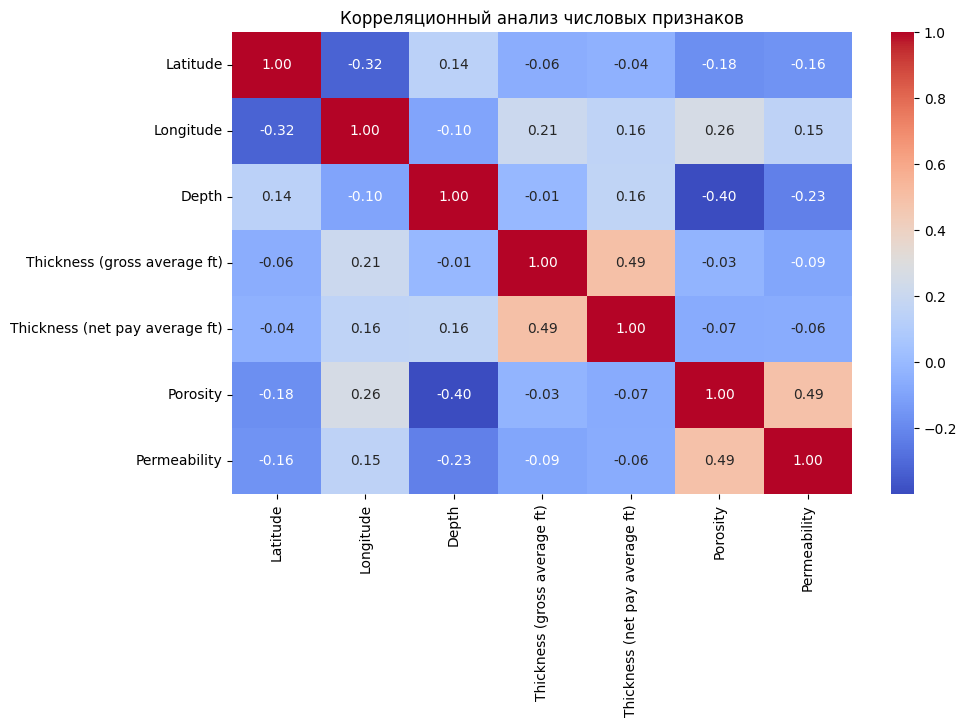

In [ ]:
# –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numeric_df = df.select_dtypes(include=['number'])

# –°—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
plt.show()


–í—ã–≤–æ–¥:
- –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è  0,49 –º–µ–∂–¥—É Thickness Gross/Net –ª–æ–≥–∏—á–Ω–∞
- –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è -0,32 –º–µ–∂–¥—É Longitude / Latitude –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º —á—Ç–æ –º–µ—Å—Ç–æ—Ä–∞–∂–¥–µ–Ω–∏—è –Ω–∞—Ö–æ–¥—è—Ç—å—Å—è –≤ –∫–ª–∞—Å—Ç–µ—Ä–∞—Ö.

–ï—Å–ª–∏ –±—ã –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏—è —Ä–∞—Å–ø–æ–ª–∞–≥–∞–ª–∏—Å—å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ, –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –¥–æ–ª–≥–æ—Ç–æ–π –∏ —à–∏—Ä–æ—Ç–æ–π –º–æ–≥–ª–∞ –±—ã –±—ã—Ç—å –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é,

- –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è 0.49 –º–µ–∂–¥—É Permiability/ Porosity

Porosity (Matrix Average): –ü–æ—Ä–∏—Å—Ç–æ—Å—Ç—å –æ–ø–∏—Å—ã–≤–∞–µ—Ç –æ–±—ä–µ–º –ø—É—Å—Ç—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–ø–æ—Ä) –≤ –≥–æ—Ä–Ω–æ–π –ø–æ—Ä–æ–¥–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ–±—â–µ–≥–æ –æ–±—ä–µ–º–∞ –ø–æ—Ä–æ–¥—ã.

Permeability (Air Average mD): –ü—Ä–æ–Ω–∏—Ü–∞–µ–º–æ—Å—Ç—å ‚Äî —ç—Ç–æ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –ø–æ—Ä–æ–¥—ã –ø—Ä–æ–ø—É—Å–∫–∞—Ç—å –∂–∏–¥–∫–æ—Å—Ç–∏ —á–µ—Ä–µ–∑ —Å–≤–æ–∏ –ø–æ—Ä—ã

–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è 0.49 –ª–æ–≥–∏—á–Ω–∞. –¢–∞–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —É–º–µ—Ä–µ–Ω–Ω—É—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é —Å–≤—è–∑—å –º–µ–∂–¥—É —ç—Ç–∏–º–∏ –¥–≤—É–º—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ, –≤ —Ü–µ–ª–æ–º, —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –ø–æ—Ä–∏—Å—Ç–æ—Å—Ç–∏ –ø—Ä–æ–Ω–∏—Ü–∞–µ–º–æ—Å—Ç—å —Ç–∞–∫–∂–µ –º–æ–∂–µ—Ç —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å—Å—è, –Ω–æ —ç—Ç–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –∂–µ—Å—Ç–∫–æ–π.


- –¥—Ä—É–≥–∏—Ö –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –Ω–µ –≤–∏–¥–Ω–æ

6. –ü—Ä–æ–≤–µ—Ä—è–µ–º  Depth / Thickness –Ω–∞ –≤—ã–±—Ä–æ—Å—ã

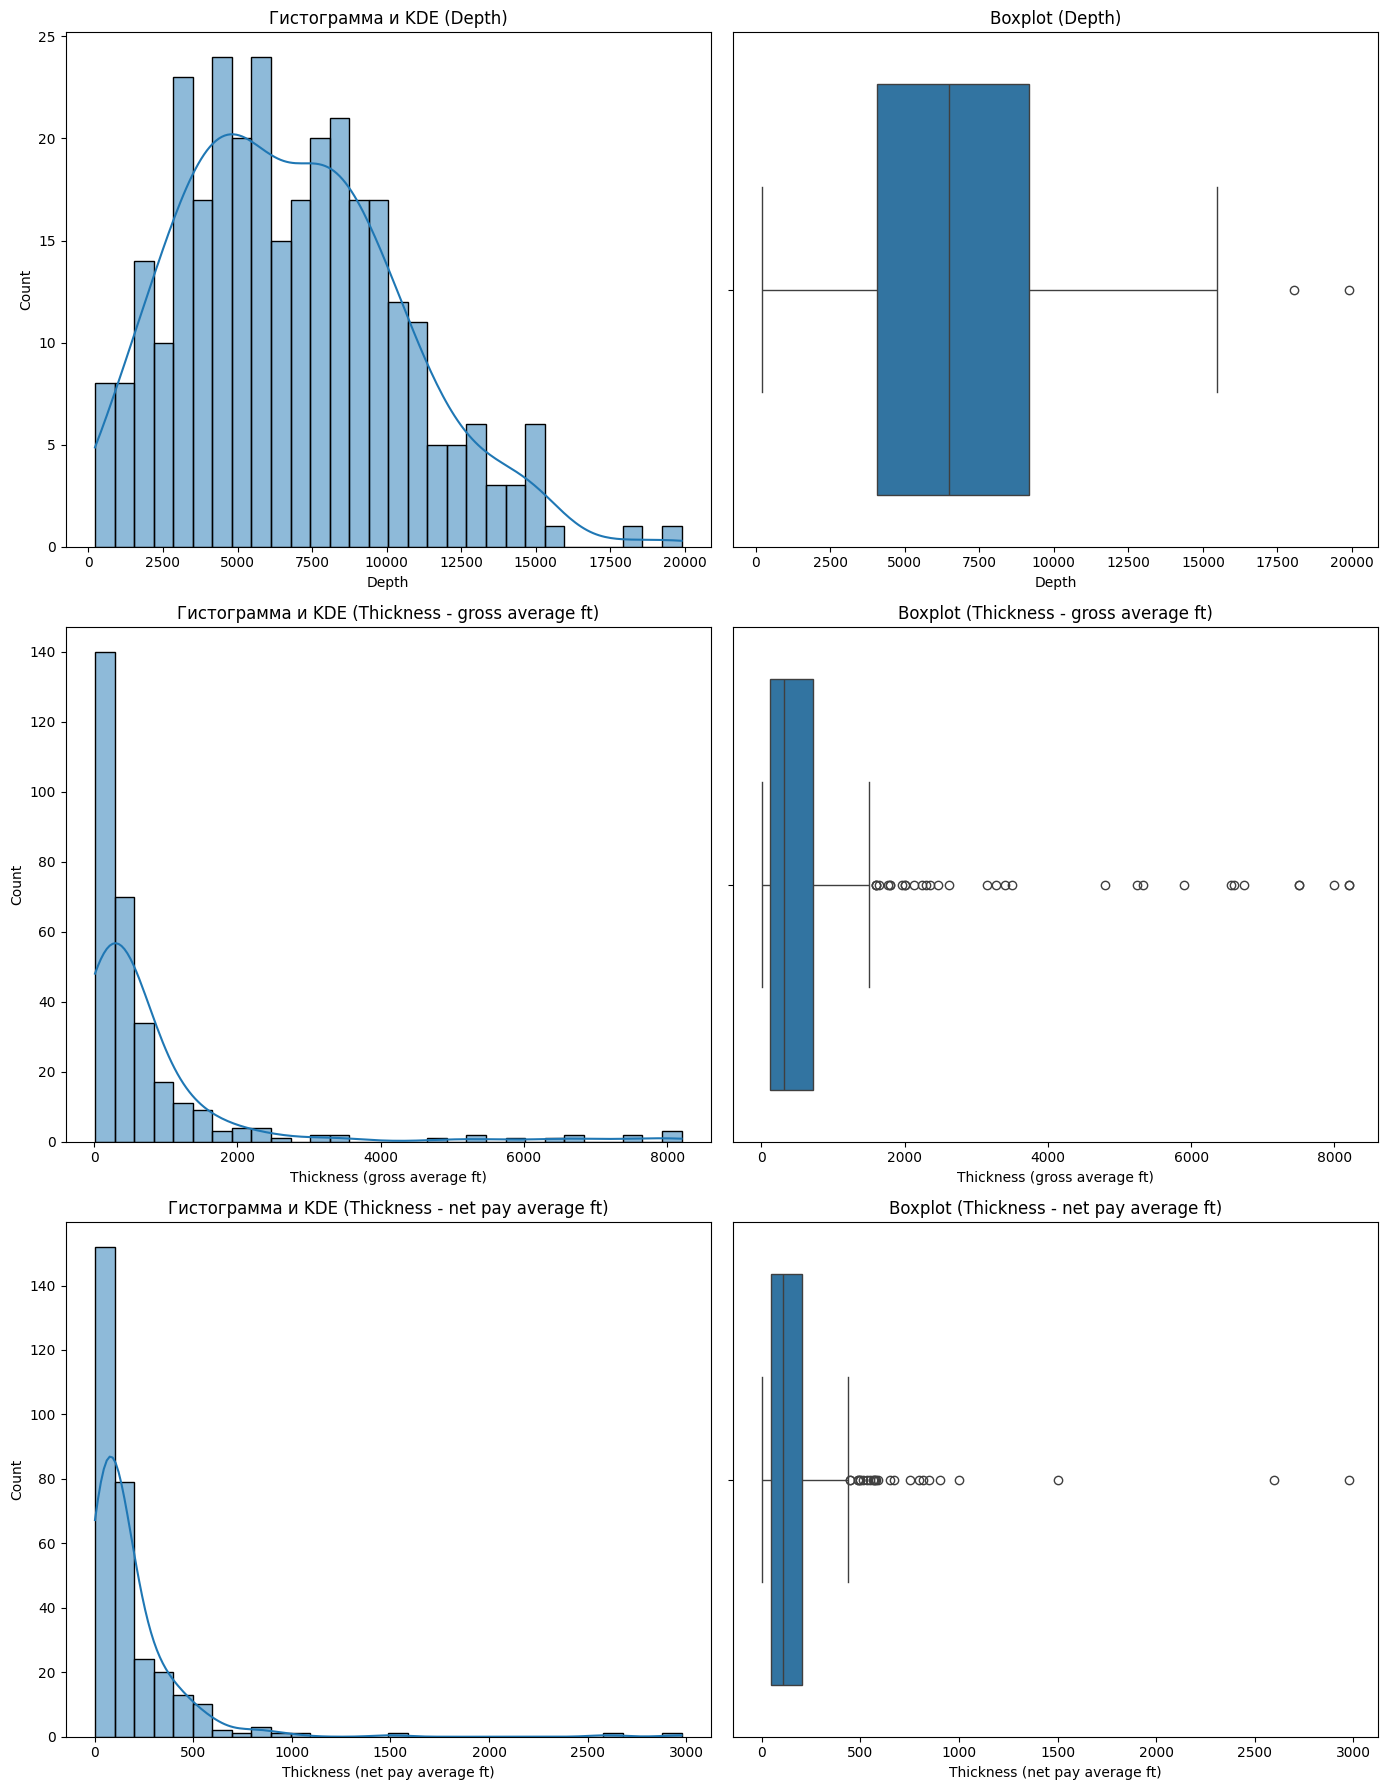

In [ ]:
# –°–æ–∑–¥–∞–µ–º –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫–∏: 3 —Å—Ç—Ä–æ–∫–∏, 2 —Å—Ç–æ–ª–±—Ü–∞
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∏ KDE –¥–ª—è Depth
sns.histplot(df['Depth'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∏ KDE (Depth)')

# Boxplot –¥–ª—è Depth
sns.boxplot(x=df['Depth'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot (Depth)')

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∏ KDE –¥–ª—è Thickness (gross average ft)
sns.histplot(df['Thickness (gross average ft)'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∏ KDE (Thickness - gross average ft)')

# Boxplot –¥–ª—è Thickness (gross average ft)
sns.boxplot(x=df['Thickness (gross average ft)'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot (Thickness - gross average ft)')

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∏ KDE –¥–ª—è Thickness (net pay average ft)
sns.histplot(df['Thickness (net pay average ft)'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∏ KDE (Thickness - net pay average ft)')

# Boxplot –¥–ª—è Thickness (net pay average ft)
sns.boxplot(x=df['Thickness (net pay average ft)'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot (Thickness - net pay average ft)')

plt.tight_layout()  # –ß—Ç–æ–±—ã –≥—Ä–∞—Ñ–∏–∫–∏ –Ω–µ –Ω–∞–∫–ª–∞–¥—ã–≤–∞–ª–∏—Å—å
plt.show()


In [ ]:
# –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ Depth > 16000
high_depths = df[df['Depth'] > 16000]

# –í—ã–≤–æ–¥–∏–º –Ω–æ–º–µ—Ä–∞ —Å—Ç—Ä–æ–∫ –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è Latitude, Longitude, Country
print("–°—Ç—Ä–æ–∫–∏ —Å Depth > 16000:")
print(high_depths[['Latitude', 'Longitude', 'Country']])

–°—Ç—Ä–æ–∫–∏ —Å Depth > 16000:
     Latitude  Longitude Country
224   35.3676  -100.0793     USA
272   30.8976   -88.0660     USA


–ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã —É–∫–∞–∑–∞–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫ —Å –≥–ª—É–±–∏–Ω–æ–π –±–æ–ª–µ–µ 16‚ÄØ000 —Ñ—É—Ç–æ–≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Å–ª–µ–¥—É—é—â–∏–º –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è–º –≤ –°–®–ê:

1) **–°—Ç—Ä–æ–∫–∞ —Å –∏–Ω–¥–µ–∫—Å–æ–º 224**:
   - **–ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã**: 35.3676¬∞ —Å–µ–≤–µ—Ä–Ω–æ–π —à–∏—Ä–æ—Ç—ã, -100.0793¬∞ –∑–∞–ø–∞–¥–Ω–æ–π –¥–æ–ª–≥–æ—Ç—ã
   - **–ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ**: –û–∫–æ–ª–æ –≥–æ—Ä–æ–¥–∞ –ü–∞–º–ø–∞, —à—Ç–∞—Ç –¢–µ—Ö–∞—Å
   - **–û–ø–∏—Å–∞–Ω–∏–µ**: –ü–∞–º–ø–∞ ‚Äî –≥–æ—Ä–æ–¥ –≤ –æ–∫—Ä—É–≥–µ –ì—Ä–µ–π, –∏–∑–≤–µ—Å—Ç–µ–Ω —Å–≤–æ–µ–π –∏—Å—Ç–æ—Ä–∏–µ–π –≤ –Ω–µ—Ñ—Ç—è–Ω–æ–π –ø—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ—Å—Ç–∏.

2) **–°—Ç—Ä–æ–∫–∞ —Å –∏–Ω–¥–µ–∫—Å–æ–º 272**:
   - **–ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã**: 30.8976¬∞ —Å–µ–≤–µ—Ä–Ω–æ–π —à–∏—Ä–æ—Ç—ã, -88.0660¬∞ –∑–∞–ø–∞–¥–Ω–æ–π –¥–æ–ª–≥–æ—Ç—ã
   - **–ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ**: –†–∞–π–æ–Ω –∫ —Å–µ–≤–µ—Ä–æ-–∑–∞–ø–∞–¥—É –æ—Ç –≥–æ—Ä–æ–¥–∞ –ú–æ–±–∏–ª, —à—Ç–∞—Ç –ê–ª–∞–±–∞–º–∞
   - **–û–ø–∏—Å–∞–Ω–∏–µ**: –ú–æ–±–∏–ª ‚Äî –ø–æ—Ä—Ç–æ–≤—ã–π –≥–æ—Ä–æ–¥ –Ω–∞ –ø–æ–±–µ—Ä–µ–∂—å–µ –ú–µ–∫—Å–∏–∫–∞–Ω—Å–∫–æ–≥–æ –∑–∞–ª–∏–≤–∞, —Å —Ä–∞–∑–≤–∏—Ç–æ–π –Ω–µ—Ñ—Ç–µ—Ö–∏–º–∏—á–µ—Å–∫–æ–π –ø—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ—Å—Ç—å—é.

–û–±–∞ –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ —Ä–µ–≥–∏–æ–Ω–∞—Ö —Å –∞–∫—Ç–∏–≤–Ω–æ–π –Ω–µ—Ñ—Ç–µ–¥–æ–±—ã—á–µ–π, —á—Ç–æ –æ–±—ä—è—Å–Ω—è–µ—Ç –Ω–∞–ª–∏—á–∏–µ –≥–ª—É–±–æ–∫–∏—Ö —Å–∫–≤–∞–∂–∏–Ω.

–í—ã–±—Ä–∞—Å—ã –æ–±–æ—Å–Ω–æ–≤–∞–Ω—ã –∏ –≤–æ–∑–º–æ–∂–Ω—ã. –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–π –≤—ã–±—Ä–æ—Å –Ω–µ –Ω—É–∂–Ω–æ.



7. –≤—ã–±—Ä–æ—Å—ã –≤ Thickness Gross/Net n–æ–∂–µ –≥–µ–æ–ª–æ–≥–∏—á–µ—Å–∫–∏ –æ–±–æ—Å–Ω–æ–≤–∞–Ω—ã –¥–ª—è –í –≥–ª—É–±–æ–∫–æ–≤–æ–¥–Ω—ã—Ö –∏ —à–µ–ª—å—Ñ–æ–≤—ã—Ö –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏—è—Ö. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–∞–∫–∞—è –≥–ª—É–±–∏–Ω–∞ —Å–∫–≤–∞–∂–∏–Ω —Å —Ç–∞–∫–∏–º–∏ –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏ –≥–¥–µ –æ–Ω–∏ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã

In [ ]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å—Ç—Ä–æ–∫, –≥–¥–µ —Ç–æ–ª—â–∏–Ω–∞ –±–æ–ª—å—à–µ 2000
filtered_df = df[df['Thickness (gross average ft)'] > 2000]

# –í—ã–≤–æ–¥ –Ω—É–∂–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫ –≤–º–µ—Å—Ç–µ —Å –∏–Ω–¥–µ–∫—Å–æ–º —Å—Ç—Ä–æ–∫–∏
print(filtered_df[['Field name', 'Country', 'Depth', 'Thickness (gross average ft)']].reset_index())


    index         Field name       Country  Depth  \
0       1        LAGOA PARDA        BRAZIL   4843   
1      20            BONGKOT      THAILAND   3020   
2      23            VENTURE        CANADA  14231   
3      33           GASIKULE           NaN   4199   
4      50        PALM VALLEY           NaN   5656   
5      97        DZHIGALYBEG  TURKMENISTAN  10100   
6      99       KARACHAGANAK    KAZAKHSTAN  11870   
7     112        WENMINGZHAI         CHINA   4462   
8     117            KOROLEV    KAZAKHSTAN  12746   
9     122          WANGCHANG         CHINA   2421   
10    128          GOTURDEPE  TURKMENISTAN   5200   
11    134           CHELEKEN  TURKMENISTAN   1800   
12    147           WATERTON        CANADA   8100   
13    165            VAREGAN        RUSSIA   5577   
14    207          YANGSANMU         CHINA   3898   
15    241           NATUNA L     INDONESIA   8218   
16    249          WILBURTON           USA  12860   
17    288           SAMARANG      MALAYSIA   1

8. –µ—Å—Ç—å –ª–∏ —Å—Ç—Ä–æ–∫–∏ –≥–¥–µ Thickness (gross average ft) < Thickness (net pay average ft)

In [ ]:
# –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ 'Thickness (gross average ft)' < 'Thickness (net pay average ft)'
invalid_rows = df[df['Thickness (gross average ft)'] < df['Thickness (net pay average ft)']]

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ —Ç–∞–∫–∏–µ —Å—Ç—Ä–æ–∫–∏
if not invalid_rows.empty:
    print("–ù–∞–π–¥–µ–Ω—ã —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ 'Thickness (gross average ft)' < 'Thickness (net pay average ft)':")
    print(invalid_rows[['Thickness (gross average ft)', 'Thickness (net pay average ft)']].reset_index())
else:
    print("–¢–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫ –Ω–µ—Ç.")


–ù–∞–π–¥–µ–Ω—ã —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ 'Thickness (gross average ft)' < 'Thickness (net pay average ft)':
   index  Thickness (gross average ft)  Thickness (net pay average ft)
0    124                          11.0                            12.0


In [ ]:
# –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ 'Thickness (gross average ft)' < 'Thickness (net pay average ft)'
invalid_rows = df_test[df_test['Thickness (gross average ft)'] < df_test['Thickness (net pay average ft)']]

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ —Ç–∞–∫–∏–µ —Å—Ç—Ä–æ–∫–∏
if not invalid_rows.empty:
    print("–ù–∞–π–¥–µ–Ω—ã —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ 'Thickness (gross average ft)' < 'Thickness (net pay average ft)':")
    print(invalid_rows[['Thickness (gross average ft)', 'Thickness (net pay average ft)']].reset_index())
else:
    print("–¢–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫ –Ω–µ—Ç.")


–ù–∞–π–¥–µ–Ω—ã —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ 'Thickness (gross average ft)' < 'Thickness (net pay average ft)':
   index  Thickness (gross average ft)  Thickness (net pay average ft)
0     74                         820.0                           928.0
1     96                         500.0                           520.0


9. –°–º–æ—Ç—Ä–∏–º –Ω–µ—Ç –ª–∏ —Å–∫–≤–∞–∂–∏–Ω —Ç–∞–º –≥–¥–µ –∏—Ö –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å: –æ–∫–µ–∞–Ω—ã, –≥–æ—Ä—ã

–ü—Ä–∏ –Ω–∞–≤–µ–¥–µ–Ω–∏–∏ –∫—É—Ä—Å–æ—Ä–∞ –Ω–∞ –∑–Ω–∞—á–µ–∫ –≤—ã–≤–æ–¥–∏—Ç—å—Å—è –Ω–æ–º–µ—Ä —Å—Ç—Ä–æ–∫–∏, –≥–ª—É–±–∏–Ω–∞ —Å–∫–≤–∞–∂–∏–Ω—ã, Onshore/Offshore

In [ ]:
print(df['Onshore/Offshore'].unique())

['ONSHORE' 'OFFSHORE' 'ONSHORE-OFFSHORE']


- –í–∏–∑—É–∞–ª—å–Ω–æ —Å–º–æ—Ç—Ä–∏–º –Ω–µ—Ç –ª–∏ –Ω–∞ —Å—É—à–µ –∑–Ω–∞—á–µ–Ω–∏–π offshore –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç

In [ ]:
#pip install geopy pycountry-convert --quiet

In [ ]:
import folium

# –°–æ–∑–¥–∞–Ω–∏–µ –∫–∞—Ä—Ç—ã —Å —Ü–µ–Ω—Ç—Ä–æ–º –≤ —Å—Ä–µ–¥–Ω–µ–º –∑–Ω–∞—á–µ–Ω–∏–∏ —à–∏—Ä–æ—Ç—ã –∏ –¥–æ–ª–≥–æ—Ç—ã
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2)

# –¶–≤–µ—Ç–∞ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–π
color_map = {
    "onshore": "blue",
    "offshore": "red"
}

# –î–æ–±–∞–≤–ª—è–µ–º –º–∞—Ä–∫–µ—Ä—ã
for index, row in df.iterrows():
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):  # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ NaN
        category = str(row['Onshore/Offshore']).strip().lower()  # –ü—Ä–∏–≤–æ–¥–∏–º –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É
        color = color_map.get(category, "green")  # –ï—Å–ª–∏ –Ω–µ Onshore/Offshore, —Å—Ç–∞–≤–∏–º –∑–µ–ª—ë–Ω—ã–π

        popup_content = f"Row: {index}<br>Depth: {row['Depth']}<br>Onshore/Offshore: {row['Onshore/Offshore']}"
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=popup_content,
            icon=folium.Icon(color=color)
        ).add_to(m)

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –∫–∞—Ä—Ç—É –≤ HTML
m.save("map.html")

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∫–∞—Ä—Ç—ã –≤ Jupyter
m


–ú–æ–∂–Ω–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å –ø–æ–∏—Å–∫ —Å–∫–≤–∞–∂–∏–Ω, –Ω–∞—Ö–æ–¥—è—â–∏—Ö—Å—è –≤–Ω—É—Ç—Ä–∏ –∑–∞–¥–∞–Ω–Ω—ã—Ö –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω—ã—Ö –æ–±–ª–∞—Å—Ç–µ–π (–∏–ª–∏ –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤), –æ–ø—Ä–µ–¥–µ–ª—è—è –∏—Ö —á–µ—Ä–µ–∑ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã —É–≥–ª–æ–≤.

–ù–∞–ø—Ä–∏–º–µ—Ä:
- –ì—Ä–µ–Ω–∞–¥—ã–π—Å–∫–∞—è –≤–ø–∞–¥–∏–Ω–∞
–®–∏—Ä–æ—Ç–∞: 11¬∞00‚Ä≤N ‚Äî 13¬∞30‚Ä≤N
–î–æ–ª–≥–æ—Ç–∞: 59¬∞00‚Ä≤W ‚Äî 63¬∞00‚Ä≤W
- –ì–æ–ª—å—Ñ—Å—Ç—Ä–∏–º
–®–∏—Ä–æ—Ç–∞: –æ–∫–æ–ª–æ 30¬∞N ‚Äî 35¬∞N
–î–æ–ª–≥–æ—Ç–∞: –æ–∫–æ–ª–æ 70¬∞W ‚Äî 75¬∞W
–®–∏—Ä–æ—Ç–∞: –æ–∫–æ–ª–æ 40¬∞N ‚Äî 45¬∞N
–î–æ–ª–≥–æ—Ç–∞: –æ–∫–æ–ª–æ 50¬∞W ‚Äî 55¬∞W
- –¢–µ–±–µ—Ç
–®–∏—Ä–æ—Ç–∞: 26¬∞N ‚Äî 37¬∞N
–î–æ–ª–≥–æ—Ç–∞: 78¬∞E ‚Äî 95¬∞E

In [ ]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º –¥–∏–∞–ø–∞–∑–æ–Ω–∞–º –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç, –≤–∫–ª—é—á–∞—è –¢–∏–±–µ—Ç
df_filtered = df[((df['Latitude'] >= 11.0) & (df['Latitude'] <= 13.5) &
                  (df['Longitude'] >= -63.0) & (df['Longitude'] <= -59.0)) |
                 ((df['Latitude'] >= 30.0) & (df['Latitude'] <= 35.0) &
                  (df['Longitude'] >= -75.0) & (df['Longitude'] <= -70.0)) |
                 ((df['Latitude'] >= 40.0) & (df['Latitude'] <= 45.0) &
                  (df['Longitude'] >= -55.0) & (df['Longitude'] <= -50.0)) |
                 ((df['Latitude'] >= 26.0) & (df['Latitude'] <= 37.0) &
                  (df['Longitude'] >= 78.0) & (df['Longitude'] <= 95.0))]

# –ü—Ä–æ—Å–º–æ—Ç—Ä –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("–ù–∞–π–¥–µ–Ω–æ —Å—Ç—Ä–æ–∫: ", len(df_filtered))



–ù–∞–π–¥–µ–Ω–æ —Å—Ç—Ä–æ–∫:  0


# 2. Feature Engineering - –í–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ –∫–æ—Ç–æ—Ä—ã–µ –≤–æ–∑–º–æ–∂–Ω–æ

1. –í–æ—Å—Ç–∞–Ω–æ–≤–∏–º Region (–≥–¥–µ –≤–æ–∑–º–æ–∂–Ω–æ)

- –°–≤—è–∑—å Region/Country

In [ ]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ —Å—Ç–æ–ª–±—Ü—É 'Country' –∏ –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω—ã –≤—ã–≤–æ–¥–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'Region'
country_region = df.groupby('Country')['Region'].unique()

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(country_region)

Country
AFGHANISTAN                            [FAR EAST]
ALGERIA                                  [AFRICA]
ANGOLA                                   [AFRICA]
AUSTRALIA                         [nan, FAR EAST]
BRAZIL                            [LATIN AMERICA]
CANADA                            [NORTH AMERICA]
CHINA                             [FAR EAST, nan]
COLOMBIA                          [LATIN AMERICA]
DENMARK                                  [EUROPE]
EGYPT                                    [AFRICA]
EQUATORIAL GUINEA                        [AFRICA]
FRANCE                                   [EUROPE]
GABON                                    [AFRICA]
INDIA                             [nan, FAR EAST]
INDONESIA                         [FAR EAST, nan]
IRAN                                [MIDDLE EAST]
IRAQ                                [MIDDLE EAST]
KAZAKHSTAN                  [FORMER SOVIET UNION]
LIBYA                                    [AFRICA]
MALAYSIA                               [FA

In [ ]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ —Å—Ç–æ–ª–±—Ü—É 'Country' –∏ –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω—ã –≤—ã–≤–æ–¥–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'Region'
country_region = df_test.groupby('Country')['Region'].unique()

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(country_region)

Country
ANGOLA                                    [AFRICA]
AUSTRALIA                               [FAR EAST]
AUSTRIA                                   [EUROPE]
BAHRAIN                              [MIDDLE EAST]
BRAZIL                             [LATIN AMERICA]
CANADA                             [NORTH AMERICA]
CHINA                              [FAR EAST, nan]
DENMARK                                   [EUROPE]
ECUADOR                            [LATIN AMERICA]
EGYPT                                     [AFRICA]
FRANCE                                    [EUROPE]
INDIA                                   [FAR EAST]
INDONESIA                               [FAR EAST]
IRAN                                 [MIDDLE EAST]
KAZAKHSTAN                   [FORMER SOVIET UNION]
KUWAIT                               [MIDDLE EAST]
MALAYSIA                                [FAR EAST]
MAURITANIA                                [AFRICA]
NETHERLANDS /GERMANY                      [EUROPE]
NEUTRAL ZONE           

- –ü—Ä–æ–≤–µ—Ä–∏–º –µ—Å—Ç—å –ª–∏ —Å—Ç—Ä–æ–∫–∏ –≥–¥–µ –ø—Ä–æ–ø—É—â–µ–Ω—ã Region, –Ω–æ –Ω–µ –ø—Ä–æ–ø—É—â–µ–Ω Country

In [ ]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å—Ç—Ä–æ–∫, –≥–¥–µ –ø—Ä–æ–ø—É—â–µ–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ 'Region', –Ω–æ –Ω–µ –≤ 'Country'
missing_region = df[df['Region'].isnull() & df['Country'].notnull()]

# –í—ã–≤–æ–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ 'Region', –Ω–æ –Ω–µ –≤ 'Country':", missing_region.shape[0])

# –í—ã–≤–æ–¥–∏–º —Å—Ç—Ä–æ–∫–∏
print(missing_region['Country'])


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ 'Region', –Ω–æ –Ω–µ –≤ 'Country': 11
16         INDIA
21     AUSTRALIA
40           USA
66            UK
82        RUSSIA
107        CHINA
143          USA
214          USA
226    INDONESIA
229       RUSSIA
230           UK
Name: Country, dtype: object


- –í–∏–¥–Ω–æ, —á—Ç–æ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ Region –º–æ–∂–Ω–æ –≤–æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—å

In [ ]:
# –°–ª–æ–≤–∞—Ä—å –¥–ª—è –∑–∞–º–µ–Ω—ã –ø—Ä–æ–ø—É—Å–∫–æ–≤
region_dict = {
    "AFGHANISTAN": "FAR EAST",
    "ALGERIA": "AFRICA",
    "ANGOLA": "AFRICA",
    "AUSTRALIA": "FAR EAST",
    "BRAZIL": "LATIN AMERICA",
    "CANADA": "NORTH AMERICA",
    "CHINA": "FAR EAST",
    "COLOMBIA": "LATIN AMERICA",
    "DENMARK": "EUROPE",
    "EGYPT": "AFRICA",
    "EQUATORIAL GUINEA": "AFRICA",
    "FRANCE": "EUROPE",
    "GABON": "AFRICA",
    "INDIA": "FAR EAST",
    "INDONESIA": "FAR EAST",
    "IRAN": "MIDDLE EAST",
    "IRAQ": "MIDDLE EAST",
    "KAZAKHSTAN": "FORMER SOVIET UNION",
    "LIBYA": "AFRICA",
    "MALAYSIA": "FAR EAST",
    "NEUTRAL ZONE": "MIDDLE EAST",
    "NIGERIA": "AFRICA",
    "NORWAY": "EUROPE",
    "NORWAY /UK": "EUROPE",
    "OMAN": "MIDDLE EAST",
    "PAPUA NEW GUINEA": "FAR EAST",
    "QATAR": "MIDDLE EAST",
    "RUSSIA": "FORMER SOVIET UNION",
    "SAUDI ARABIA": "MIDDLE EAST",
    "SOUTH AFRICA": "AFRICA",
    "THAILAND": "FAR EAST",
    "TRINIDAD AND TOBAGO": "LATIN AMERICA",
    "TUNISIA": "AFRICA",
    "TUNISIA /ALGERIA": "AFRICA",
    "TURKEY": "MIDDLE EAST",
    "TURKMENISTAN": "FORMER SOVIET UNION",
    "UAE": "MIDDLE EAST",
    "UK": "EUROPE",
    "UK /NORWAY": "EUROPE",
    "USA": "NORTH AMERICA",
    "UZBEKISTAN": "FORMER SOVIET UNION",
    "VENEZUELA": "LATIN AMERICA"
}

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–º–µ–Ω—ã –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ 'Region'
def replace_region(row):
    if pd.isnull(row['Region']):
        return region_dict.get(row['Country'], row['Region'])
    return row['Region']

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫ DataFrame
df['Region'] = df.apply(replace_region, axis=1)

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å—Ç—Ä–æ–∫, –≥–¥–µ –ø—Ä–æ–ø—É—â–µ–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ 'Region', –Ω–æ –Ω–µ –≤ 'Country'
missing_region = df[df['Region'].isnull() & df['Country'].notnull()]

# –í—ã–≤–æ–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ 'Region', –Ω–æ –Ω–µ –≤ 'Country':", missing_region.shape[0])

# –í—ã–≤–æ–¥–∏–º —Å—Ç—Ä–æ–∫–∏
print(missing_region['Country'])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ 'Region', –Ω–æ –Ω–µ –≤ 'Country': 0
Series([], Name: Country, dtype: object)


2. –í–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–º Basin name (–≥–¥–µ –≤–æ–∑–º–æ–∂–Ω–æ)

- –°–≤—è–∑—å Country/Basinname

In [ ]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ —Å—Ç–æ–ª–±—Ü—É 'Country' –∏ –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω—ã –≤—ã–≤–æ–¥–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'Region'
country_region = df.groupby('Basin name')['Country'].unique()

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(country_region)

Basin name
ABU GHARADIG                                          [EGYPT]
AMU DARYA             [UZBEKISTAN, TURKMENISTAN, AFGHANISTAN]
ANADARKO                                                [USA]
APPALACHIAN                                             [USA]
AQUITAINE                                            [FRANCE]
                                       ...                   
WESTERN CANADA                                       [CANADA]
WESTERN OVERTHRUST                                      [USA]
WILLISTON                                       [USA, CANADA]
YINGGEHAI                                             [CHINA]
ZAGROS                                           [IRAN, IRAQ]
Name: Country, Length: 93, dtype: object


- –ü—Ä–æ–≤–µ—Ä–∏–º –µ—Å—Ç—å –ª–∏ —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ Basin name, –Ω–æ –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–∞ –≤ Country  

In [ ]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ 'Basin name' –∏ –Ω–µ–Ω—É–ª–µ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ 'Country'
missing_basin = df[df['Basin name'].isnull() & df['Country'].notnull()]

# –í—ã–≤–æ–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º 'Basin name' –∏ –Ω–µ–Ω—É–ª–µ–≤—ã–º 'Country': {missing_basin.shape[0]}")

# –î–∞–Ω–Ω—ã–µ –æ –±–∞—Å—Å–µ–π–Ω–∞—Ö –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω—ã
basin_info = {
    "AFGHANISTAN": "FAR EAST",
    "ALGERIA": "AFRICA",
    "ANGOLA": "AFRICA",
    "AUSTRALIA": "FAR EAST",
    "BRAZIL": "LATIN AMERICA",
    "CANADA": "NORTH AMERICA",
    "CHINA": "FAR EAST",
    "COLOMBIA": "LATIN AMERICA",
    "DENMARK": "EUROPE",
    "EGYPT": "AFRICA",
    "EQUATORIAL GUINEA": "AFRICA",
    "FRANCE": "EUROPE",
    "GABON": "AFRICA",
    "INDIA": "FAR EAST",
    "INDONESIA": "FAR EAST",
    "IRAN": "MIDDLE EAST",
    "IRAQ": "MIDDLE EAST",
    "KAZAKHSTAN": "FORMER SOVIET UNION",
    "LIBYA": "AFRICA",
    "MALAYSIA": "FAR EAST",
    "NEUTRAL ZONE": "MIDDLE EAST",
    "NIGERIA": "AFRICA",
    "NORWAY": "EUROPE",
    "OMAN": "MIDDLE EAST",
    "PAPUA NEW GUINEA": "FAR EAST",
    "QATAR": "MIDDLE EAST",
    "RUSSIA": "FORMER SOVIET UNION",
    "SAUDI ARABIA": "MIDDLE EAST",
    "SOUTH AFRICA": "AFRICA",
    "THAILAND": "FAR EAST",
    "TRINIDAD AND TOBAGO": "LATIN AMERICA",
    "TUNISIA": "AFRICA",
    "TURKEY": "MIDDLE EAST",
    "TURKMENISTAN": "FORMER SOVIET UNION",
    "UAE": "MIDDLE EAST",
    "UK": "EUROPE",
    "USA": "NORTH AMERICA",
    "UZBEKISTAN": "FORMER SOVIET UNION",
    "VENEZUELA": "LATIN AMERICA"
}

# –í—ã–≤–æ–¥–∏–º –∏–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫, –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç—Ä–∞–Ω –∏ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º—ã–µ –±–∞—Å—Å–µ–π–Ω—ã
for idx, country in missing_basin['Country'].items():
    # –ò—â–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –±–∞—Å—Å–µ–π–Ω–µ –ø–æ —Å—Ç—Ä–∞–Ω–µ
    basin = basin_info.get(country, "–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –±–∞—Å—Å–µ–π–Ω–µ –Ω–µ –Ω–∞–π–¥–µ–Ω–∞")
    print(f"–°—Ç—Ä–æ–∫–∞ {idx}: {country} - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: {basin}")


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º 'Basin name' –∏ –Ω–µ–Ω—É–ª–µ–≤—ã–º 'Country': 11
–°—Ç—Ä–æ–∫–∞ 16: INDIA - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: FAR EAST
–°—Ç—Ä–æ–∫–∞ 21: AUSTRALIA - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: FAR EAST
–°—Ç—Ä–æ–∫–∞ 40: USA - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: NORTH AMERICA
–°—Ç—Ä–æ–∫–∞ 66: UK - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: EUROPE
–°—Ç—Ä–æ–∫–∞ 82: RUSSIA - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: FORMER SOVIET UNION
–°—Ç—Ä–æ–∫–∞ 107: CHINA - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: FAR EAST
–°—Ç—Ä–æ–∫–∞ 143: USA - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: NORTH AMERICA
–°—Ç—Ä–æ–∫–∞ 214: USA - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: NORTH AMERICA
–°—Ç—Ä–æ–∫–∞ 226: INDONESIA - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: FAR EAST
–°—Ç—Ä–æ–∫–∞ 229: RUSSIA - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –±–∞—Å—Å–µ–π–Ω: FORMER SOVIET UNION
–°—Ç—Ä–æ–∫–∞ 230: UK - –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–

- –í–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ Basin name

In [ ]:
# –í–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ 'Basin name' –ø–æ —Å–ª–æ–≤–∞—Ä—é basin_info
df['Basin name'] = df.apply(
    lambda row: basin_info.get(row['Country'], row['Basin name']) if pd.isnull(row['Basin name']) else row['Basin name'],
    axis=1
)

# –í–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ 'Basin name' –ø–æ —Å–ª–æ–≤–∞—Ä—é basin_info
df_test['Basin name'] = df_test.apply(
    lambda row: basin_info.get(row['Country'], row['Basin name']) if pd.isnull(row['Basin name']) else row['Basin name'],
    axis=1
)
# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –ø—Ä–æ–ø—É—Å–∫–∏ –±—ã–ª–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã
print(f"Train: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ 'Basin name' –ø–æ—Å–ª–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è: {df['Basin name'].isnull().sum()}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –ø—Ä–æ–ø—É—Å–∫–∏ –±—ã–ª–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã
print(f"Test: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ 'Basin name' –ø–æ—Å–ª–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è: {df_test['Basin name'].isnull().sum()}")


Train: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ 'Basin name' –ø–æ—Å–ª–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è: 27
Test: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ 'Basin name' –ø–æ—Å–ª–µ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è: 8


3. –í–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–º Longitude (–≥–¥–µ –≤–æ–∑–º–æ–∂–Ω–æ)

In [ ]:
# –ü–æ–ª—É—á–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è Latitude, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç Longitude
latitude_without_longitude = df[df['Latitude'].notnull() & df['Longitude'].isnull()]['Latitude'].unique()

# –ò—â–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ç–∞–∫–∏–º–∏ –∂–µ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ Latitude –∏ –≤—ã–≤–æ–¥–∏–º –∏–Ω–¥–µ–∫—Å—ã, –≤–∫–ª—é—á–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ Country
for lat in latitude_without_longitude:
    matching_rows = df[df['Latitude'] == lat]
    for idx, row in matching_rows.iterrows():
        print(f"Train: –°—Ç—Ä–æ–∫–∞ {idx}: Latitude = {row['Latitude']}, Longitude = {row['Longitude']}, Country = {row['Country']}")


Train: –°—Ç—Ä–æ–∫–∞ 130: Latitude = 31.39, Longitude = nan, Country = ALGERIA
Train: –°—Ç—Ä–æ–∫–∞ 160: Latitude = 29.783, Longitude = nan, Country = EGYPT
Train: –°—Ç—Ä–æ–∫–∞ 232: Latitude = 53.6204, Longitude = nan, Country = UK


In [ ]:
# –ü–æ–ª—É—á–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è Latitude, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç Longitude
latitude_without_longitude = df_test[df_test['Latitude'].notnull() & df_test['Longitude'].isnull()]['Latitude'].unique()

# –ò—â–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ç–∞–∫–∏–º–∏ –∂–µ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ Latitude –∏ –≤—ã–≤–æ–¥–∏–º –∏–Ω–¥–µ–∫—Å—ã, –≤–∫–ª—é—á–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ Country
for lat in latitude_without_longitude:
    matching_rows = df_test[df_test['Latitude'] == lat]
    for idx, row in matching_rows.iterrows():
        print(f"Test: –°—Ç—Ä–æ–∫–∞ {idx}: Latitude = {row['Latitude']}, Longitude = {row['Longitude']}, Country = {row['Country']}")


Test: –°—Ç—Ä–æ–∫–∞ 27: Latitude = 33.0456, Longitude = nan, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 35: Latitude = 39.58, Longitude = nan, Country = TURKMENISTAN
Test: –°—Ç—Ä–æ–∫–∞ 71: Latitude = 20.8219, Longitude = nan, Country = CHINA


In [ ]:
# –°–ø–∏—Å–æ–∫ —Å—Ç—Ä–∞–Ω, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –Ω—É–∂–Ω–æ –≤—ã–≤–µ—Å—Ç–∏ —Å—Ç—Ä–æ–∫–∏
countries_to_check = ['ALGERIA', 'EGYPT', 'UK']

# –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ —Å—Ç—Ä–∞–Ω–∞–º–∏ –∏ –≤—ã–≤–æ–¥–∏–º —Ç–æ–ª—å–∫–æ Latitude, Longitude –∏ Country
for country in countries_to_check:
    matching_rows = df[df['Country'] == country]
    for idx, row in matching_rows.iterrows():
        print(f"Train: –°—Ç—Ä–æ–∫–∞ {idx}: Latitude = {row['Latitude']}, Longitude = {row['Longitude']}, Country = {row['Country']}")


Train: –°—Ç—Ä–æ–∫–∞ 130: Latitude = 31.39, Longitude = nan, Country = ALGERIA
Train: –°—Ç—Ä–æ–∫–∞ 114: Latitude = 29.841, Longitude = 27.915, Country = EGYPT
Train: –°—Ç—Ä–æ–∫–∞ 160: Latitude = 29.783, Longitude = nan, Country = EGYPT
Train: –°—Ç—Ä–æ–∫–∞ 193: Latitude = 31.4382, Longitude = 31.3616, Country = EGYPT
Train: –°—Ç—Ä–æ–∫–∞ 254: Latitude = 29.8589, Longitude = 28.5229, Country = EGYPT
Train: –°—Ç—Ä–æ–∫–∞ 255: Latitude = 31.84, Longitude = 32.145, Country = EGYPT
Train: –°—Ç—Ä–æ–∫–∞ 293: Latitude = 28.2919, Longitude = 33.3144, Country = EGYPT
Train: –°—Ç—Ä–æ–∫–∞ 297: Latitude = 28.2349, Longitude = 33.4649, Country = EGYPT
Train: –°—Ç—Ä–æ–∫–∞ 14: Latitude = 56.1648, Longitude = 3.0593, Country = UK
Train: –°—Ç—Ä–æ–∫–∞ 19: Latitude = 56.45, Longitude = 2.2833, Country = UK
Train: –°—Ç—Ä–æ–∫–∞ 54: Latitude = 57.0556, Longitude = 2.0694, Country = UK
Train: –°—Ç—Ä–æ–∫–∞ 64: Latitude = 50.6672, Longitude = -2.0278, Country = UK
Train: –°—Ç—Ä–æ–∫–∞ 66: Latitude = 53.3932, Longitu

In [ ]:
# –°–ø–∏—Å–æ–∫ —Å—Ç—Ä–∞–Ω, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –Ω—É–∂–Ω–æ –≤—ã–≤–µ—Å—Ç–∏ —Å—Ç—Ä–æ–∫–∏
countries_to_check = ['USA', 'TURKMENISTAN', 'CHINA']

# –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ —Å—Ç—Ä–∞–Ω–∞–º–∏ –∏ –≤—ã–≤–æ–¥–∏–º —Ç–æ–ª—å–∫–æ Latitude, Longitude –∏ Country
for country in countries_to_check:
    matching_rows = df_test[df_test['Country'] == country]
    for idx, row in matching_rows.iterrows():
        print(f"Test: –°—Ç—Ä–æ–∫–∞ {idx}: Latitude = {row['Latitude']}, Longitude = {row['Longitude']}, Country = {row['Country']}")


Test: –°—Ç—Ä–æ–∫–∞ 15: Latitude = 31.9486, Longitude = -92.932, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 16: Latitude = 26.57, Longitude = -99.15, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 17: Latitude = 36.27244, Longitude = -100.33188, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 19: Latitude = 39.9739, Longitude = -101.1508, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 21: Latitude = 34.3408, Longitude = -119.5309, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 22: Latitude = 42.64, Longitude = -106.84, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 23: Latitude = 42.98, Longitude = -106.87, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 27: Latitude = 33.0456, Longitude = nan, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 30: Latitude = 44.039, Longitude = -107.748, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 32: Latitude = 43.2827, Longitude = -84.8716, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 34: Latitude = 36.4773, Longitude = -109.1404, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 38: Latitude = 31.5521, Longitude = -102.4349, Country = USA
Test: –°—Ç—Ä–æ–∫–∞ 44: Latitude = 27.7656, Longitude = -90.72,

In [ ]:
# –û–±–Ω–æ–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è Longitude –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö —Å—Ç—Ä–æ–∫
df_test.loc[27, 'Longitude'] = -92.932  # –û–±–Ω–æ–≤–ª—è–µ–º —Å—Ç—Ä–æ–∫—É 27 Longitude = -92.932 USA
df_test.loc[35, 'Longitude'] = 61.1  # –û–±–Ω–æ–≤–ª—è–µ–º —Å—Ç—Ä–æ–∫—É 35 Longitude = 61.1, Country = TURKMENISTAN
df_test.loc[71, 'Longitude'] = 107.2948  # –û–±–Ω–æ–≤–ª—è–µ–º —Å—Ç—Ä–æ–∫—É 71 Longitude = 107.2948, Country = CHINA

–°—Ç—Ä–æ–∫–∞ 130: Latitude = 31.39, Longitude = nan, Country = ALGERI - –ø–æ –∫–∞—Ä—Ç–µ —ç—Ç–æ –ø—Ä–∏–º–µ—Ä–Ω–æ Longitude = 0

–°—Ç—Ä–æ–∫–∞ 160: Latitude = 29.783, Longitude = nan, Country = EGYPT –±–µ—Ä–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ —Å—Ç—Ä–æ–∫–∏ 114: Latitude = 29.841, Longitude = 27.915, Country = EGYPT

–°—Ç—Ä–æ–∫–∞ 232: Latitude = 53.6204, Longitude = nan, Country = UK –±–µ—Ä–µ–º –∏–∑ —Å—Ç—Ä–æ–∫–∏ 121: Latitude = 61.1, Longitude = 1.3167, Country = UK

In [ ]:
# –û–±–Ω–æ–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è Longitude –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö —Å—Ç—Ä–æ–∫
df.loc[130, 'Longitude'] = 0.0  # –û–±–Ω–æ–≤–ª—è–µ–º —Å—Ç—Ä–æ–∫—É 160
df.loc[160, 'Longitude'] = 27.915  # –û–±–Ω–æ–≤–ª—è–µ–º —Å—Ç—Ä–æ–∫—É 160
df.loc[232, 'Longitude'] = 1.7338  # –û–±–Ω–æ–≤–ª—è–µ–º —Å—Ç—Ä–æ–∫—É 232

4. –ò—Ç–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ —á–∞—Å—Ç–∏—á–Ω–æ–≥–æ –≤–æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
#print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ:")
#print(missing_values)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–∞—Ä—ã–π —Å–ø–∏—Å–æ–∫ 'a' –≤ —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
a_dict = dict(zip(missing_values.index, a))

# –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å—Ç–∞—Ä—ã–µ –∏ –Ω–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤
for column in missing_values.index:
    if column in a_dict:
        if a_dict[column] != missing_values[column]:
            print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ '{column}' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ {a_dict[column]}, —Å—Ç–∞–ª–æ {missing_values[column]}")
        else:
            print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ '{column}' –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: {a_dict[column]}")
    else:
        print(f"–ù–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏: {column} - {missing_values[column]}")


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Country' –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: 27
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Region' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ 38, —Å—Ç–∞–ª–æ 27
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Basin name' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ 38, —Å—Ç–∞–ª–æ 27
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Latitude' –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: 27
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Longitude' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ 30, —Å—Ç–∞–ª–æ 27


In [ ]:
missing_values = df_test.isnull().sum()
missing_values = missing_values[missing_values > 0]
#print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ:")
#print(missing_values)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–∞—Ä—ã–π —Å–ø–∏—Å–æ–∫ 'a' –≤ —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
a_dict = dict(zip(missing_values.index, a))

# –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å—Ç–∞—Ä—ã–µ –∏ –Ω–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤
for column in missing_values.index:
    if column in a_dict:
        if a_dict[column] != missing_values[column]:
            print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ '{column}' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ {a_dict[column]}, —Å—Ç–∞–ª–æ {missing_values[column]}")
        else:
            print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ '{column}' –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: {a_dict[column]}")
    else:
        print(f"–ù–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏: {column} - {missing_values[column]}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Country' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ 27, —Å—Ç–∞–ª–æ 13
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Region' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ 38, —Å—Ç–∞–ª–æ 16
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Basin name' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ 38, —Å—Ç–∞–ª–æ 8
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Latitude' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ 27, —Å—Ç–∞–ª–æ 13
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'Longitude' –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: –±—ã–ª–æ 30, —Å—Ç–∞–ª–æ 13


In [ ]:
# –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤—Å–µ —É–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
missing_all_values = df[df[['Country', 'Region', 'Basin name', 'Latitude', 'Longitude']].isnull().all(axis=1)]

# –ü–æ–ª—É—á–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude': {missing_all_values.shape[0]}")


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude': 27


In [ ]:
# –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤—Å–µ —É–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
missing_all_values = df_test[df_test[['Country', 'Region', 'Basin name', 'Latitude', 'Longitude']].isnull().all(axis=1)]

# –ü–æ–ª—É—á–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude': {missing_all_values.shape[0]}")


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude': 8


5. –í–æ –≤—Å–µ—Ö —Å—Ç—Ä–æ–∫–∞—Ö –≥–¥–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ –æ –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–∏ —Å–∫–≤–∞–∂–∏–Ω—ã, –æ—Å—Ç–∞–ª—å–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç.

–¢–∞–∫ –∫–∞–∫ –≥–µ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã —Å–∫–≤–∞–∂–∏–Ω—ã —è–≤–ª—è—é—Ç—Å—è –∑–Ω–∞—á–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π ( –æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é), —Ç–æ –ª—É—á—à–µ –Ω–µ —Å–æ–∑–¥–∞–≤–∞—Ç—å —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–º –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º ( —Ç.–µ. —É–¥–∞–ª–∏—Ç—å —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —É–¥–∞–ª–æ—Å—å –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å)

–ù–æ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥–≤–∞ –≤–∞—Ä–∏–∞–Ω—Ç–∞ ( –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π del_choice):
- del_choice = 0:

—É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ –≥–¥–µ –æ—Ç—Å—É—Ç—Å–≤—É—é—Ç 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude'

–í —ç—Ç–æ–º —Å–ª—É—á–∞–µ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
-  del_choice = 1:

–í–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è  'Country', 'Region', 'Basin name' –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é Field name

A –¥–ª—è  'Latitude', 'Longitude' —Å–æ–∑–¥–∞–µ–º –æ–¥–Ω—É —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫—É—é —Ç–æ—á–∫—É –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ —É–¥–∞–ª–µ–Ω–Ω—É—é –æ—Ç –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç


–í —ç—Ç–æ–º —Å–ª—É—á–∞–µ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–º

–ò –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫–æ–π –º–µ—Ç–æ–¥ –¥–∞–µ—Ç —É–ª—É—á—à–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

- –°–æ–∑–¥–∞–¥–∏–º —Å–ª–æ–≤–∞—Ä—å –≥–¥–µ –∫–∞–∂–¥–æ–º—É  Field name (–∫–ª—é—á) –ø–æ—Å—Ç–∞–≤–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è Country, Region, Basin name

In [ ]:
# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å, –≥—Ä—É–ø–ø–∏—Ä—É—è –¥–∞–Ω–Ω—ã–µ –ø–æ 'Field name'
field_dict = df.groupby('Field name')[['Country', 'Region', 'Basin name']].first().to_dict(orient='index')

# –í—ã–≤–µ–¥–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–º–µ—Ä–æ–≤
for key, value in list(field_dict.items())[:5]:  # –í—ã–≤–µ–¥–µ–º –ø–µ—Ä–≤—ã–µ 5 –∑–∞–ø–∏—Å–µ–π –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞
    print(f"{key}: {value}")


ABQAIQ: {'Country': 'SAUDI ARABIA', 'Region': 'MIDDLE EAST', 'Basin name': 'THE GULF'}
ABU MADI-EL QARA: {'Country': 'EGYPT', 'Region': 'AFRICA', 'Basin name': 'NILE DELTA'}
AL HUWAISAH: {'Country': 'OMAN', 'Region': 'MIDDLE EAST', 'Basin name': 'FAHUD SALT'}
ALABAMA FERRY: {'Country': 'USA', 'Region': 'NORTH AMERICA', 'Basin name': 'GULF OF MEXICO NORTHERN ONSHORE'}
ALIBEKMOLA: {'Country': 'KAZAKHSTAN', 'Region': 'FORMER SOVIET UNION', 'Basin name': 'CASPIAN NORTH'}


- –ü—Ä–æ–±—É–µ–º –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è 'Country', 'Region', 'Basin name' –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é Field name

In [ ]:
# –ö–æ–ø–∏—Ä—É–µ–º DataFrame –¥–ª—è –æ—Ç—Å–ª–µ–∂–∏–≤–∞–Ω–∏—è –∏–∑–º–µ–Ω–µ–Ω–∏–π
df_original = df.copy()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑ field_dict
def restore_value(row, col_name, field_dict):
    if pd.isna(row[col_name]):  # –ï—Å–ª–∏ –ø—Ä–æ–ø—É—Å–∫
        field_name = row["Field name"]
        if field_name in field_dict:
            return field_dict[field_name].get(col_name, "unknown")  # –ü–æ–ª—É—á–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ —Å–ª–æ–≤–∞—Ä—è
        else:
            return "unknown"
    return row[col_name]

# –ü—Ä–∏–º–µ–Ω—è–µ–º –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π
for col in ["Country", "Region", "Basin name"]:
    df[col] = df.apply(lambda row: restore_value(row, col, field_dict), axis=1)

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã "unknown"
#df["Latitude"] = df["Latitude"].apply(lambda x: -90 if pd.isna(x) else x)
#df["Longitude"] = df["Longitude"].apply(lambda x: 0 if pd.isna(x) else x)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã
recovered_rows = df[(df["Country"] != df_original["Country"]) |
                    (df["Region"] != df_original["Region"]) |
                    (df["Basin name"] != df_original["Basin name"])]

# –í—ã–≤–æ–¥ –Ω–æ–º–µ—Ä–æ–≤ —Å—Ç—Ä–æ–∫ –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
print(recovered_rows.reset_index()[["index", "Field name", "Country", "Region", "Basin name"]])


    index        Field name    Country         Region         Basin name
0      11     BADR EL DIN-2       None           None               None
1      12      BRIDGER LAKE       None           None               None
2      15             SCOTT       None           None               None
3      28             ZAKUM        UAE    MIDDLE EAST       RUB AL KHALI
4      33          GASIKULE      CHINA       FAR EAST           FAR EAST
5      35              UZEN       None           None               None
6      37               ULA       None           None               None
7      49             YIBAL       OMAN    MIDDLE EAST         FAHUD SALT
8      50       PALM VALLEY       None           None               None
9      55           WUBAITI       None           None               None
10     79           OROCUAL  VENEZUELA  LATIN AMERICA  EASTERN VENEZUELA
11     80          GLENBURN       None           None               None
12     89  HARMATTAN-ELKTON       None           No

In [ ]:
# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å, –≥—Ä—É–ø–ø–∏—Ä—É—è –¥–∞–Ω–Ω—ã–µ –ø–æ 'Field name'
field_dict = df_test.groupby('Field name')[['Country', 'Region', 'Basin name']].first().to_dict(orient='index')

# –í—ã–≤–µ–¥–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–º–µ—Ä–æ–≤
for key, value in list(field_dict.items())[:5]:  # –í—ã–≤–µ–¥–µ–º –ø–µ—Ä–≤—ã–µ 5 –∑–∞–ø–∏—Å–µ–π –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞
    print(f"{key}: {value}")

ABU GHARADIG: {'Country': 'EGYPT', 'Region': 'AFRICA', 'Basin name': 'ABU GHARADIG'}
ABU MADI-EL QARA: {'Country': 'EGYPT', 'Region': 'AFRICA', 'Basin name': 'NILE DELTA'}
ALIBEKMOLA: {'Country': 'KAZAKHSTAN', 'Region': 'FORMER SOVIET UNION', 'Basin name': 'CASPIAN NORTH'}
ALWYN NORTH: {'Country': 'UK', 'Region': 'EUROPE', 'Basin name': 'NORTH SEA NORTHERN'}
ANKLESHWAR: {'Country': 'INDIA', 'Region': 'FAR EAST', 'Basin name': 'CAMBAY'}


In [ ]:
# –ö–æ–ø–∏—Ä—É–µ–º DataFrame –¥–ª—è –æ—Ç—Å–ª–µ–∂–∏–≤–∞–Ω–∏—è –∏–∑–º–µ–Ω–µ–Ω–∏–π
df_original_test = df_test.copy()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑ field_dict
def restore_value(row, col_name, field_dict):
    if pd.isna(row[col_name]):  # –ï—Å–ª–∏ –ø—Ä–æ–ø—É—Å–∫
        field_name = row["Field name"]
        if field_name in field_dict:
            return field_dict[field_name].get(col_name, "unknown")  # –ü–æ–ª—É—á–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ —Å–ª–æ–≤–∞—Ä—è
        else:
            return "unknown"
    return row[col_name]

# –ü—Ä–∏–º–µ–Ω—è–µ–º –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π
for col in ["Country", "Region", "Basin name"]:
    df[col] = df_test.apply(lambda row: restore_value(row, col, field_dict), axis=1)

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã "unknown"
#df["Latitude"] = df["Latitude"].apply(lambda x: -90 if pd.isna(x) else x)
#df["Longitude"] = df["Longitude"].apply(lambda x: 0 if pd.isna(x) else x)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã
recovered_rows = df_test[(df_test["Country"] != df_original_test["Country"]) |
                    (df_test["Region"] != df_original_test["Region"]) |
                    (df_test["Basin name"] != df_original_test["Basin name"])]

# –í—ã–≤–æ–¥ –Ω–æ–º–µ—Ä–æ–≤ —Å—Ç—Ä–æ–∫ –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
print(recovered_rows.reset_index()[["index", "Field name", "Country", "Region", "Basin name"]])

    index            Field name       Country Region  \
0       5                  ARUN           NaN    NaN   
1      11                 BALOL           NaN    NaN   
2      13        BELAYIM MARINE           NaN    NaN   
3      27     CHALYBEAT SPRINGS           USA    NaN   
4      35               DJEITUN  TURKMENISTAN    NaN   
5      46                GORGON           NaN    NaN   
6      55                  JULY           NaN    NaN   
7      60                    KG           NaN    NaN   
8      61                KHALDA           NaN    NaN   
9      71           LIUHUA 11-1         CHINA    NaN   
10     78         MAYDAN MAHZAM           NaN    NaN   
11     87               OCTOBER           NaN    NaN   
12     91             PRIRAZLOM           NaN    NaN   
13     94                  RAMA           NaN    NaN   
14    117  VERMEJO-MOORE HOOPER           NaN    NaN   
15    123               WEIYUAN           NaN    NaN   

                         Basin name  
0        

–í–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ —Ä—É—á–Ω—É—é

In [ ]:
basin_info = {
    "AFGHANISTAN": "FAR EAST",
    "ALGERIA": "AFRICA",
    "ANGOLA": "AFRICA",
    "AUSTRALIA": "FAR EAST",
    "BRAZIL": "LATIN AMERICA",
    "CANADA": "NORTH AMERICA",
    "CHINA": "FAR EAST",
    "COLOMBIA": "LATIN AMERICA",
    "DENMARK": "EUROPE",
    "EGYPT": "AFRICA",
    "EQUATORIAL GUINEA": "AFRICA",
    "FRANCE": "EUROPE",
    "GABON": "AFRICA",
    "INDIA": "FAR EAST",
    "INDONESIA": "FAR EAST",
    "IRAN": "MIDDLE EAST",
    "IRAQ": "MIDDLE EAST",
    "KAZAKHSTAN": "FORMER SOVIET UNION",
    "LIBYA": "AFRICA",
    "MALAYSIA": "FAR EAST",
    "NEUTRAL ZONE": "MIDDLE EAST",
    "NIGERIA": "AFRICA",
    "NORWAY": "EUROPE",
    "OMAN": "MIDDLE EAST",
    "PAPUA NEW GUINEA": "FAR EAST",
    "QATAR": "MIDDLE EAST",
    "RUSSIA": "FORMER SOVIET UNION",
    "SAUDI ARABIA": "MIDDLE EAST",
    "SOUTH AFRICA": "AFRICA",
    "THAILAND": "FAR EAST",
    "TRINIDAD AND TOBAGO": "LATIN AMERICA",
    "TUNISIA": "AFRICA",
    "TURKEY": "MIDDLE EAST",
    "TURKMENISTAN": "FORMER SOVIET UNION",
    "UAE": "MIDDLE EAST",
    "UK": "EUROPE",
    "USA": "NORTH AMERICA",
    "UZBEKISTAN": "FORMER SOVIET UNION",
    "VENEZUELA": "LATIN AMERICA"
}

# –ü–æ–¥—Å—Ç–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ —Å–ª–æ–≤–∞—Ä—è —Ç–æ–ª—å–∫–æ –¥–ª—è —Å—Ç—Ä–æ–∫, –≥–¥–µ Region –ø—É—Å—Ç–æ–π (None –∏–ª–∏ NaN)
df_test["Region"] = df_test["Region"].fillna(df_test["Country"].map(basin_info))

In [ ]:
import pandas as pd

df_filtered_test = df_test[df_test['Field name'] == 'LIUHUA 11-1']
# –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ –Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
df_filtered_test = df_filtered_test[['Field name', 'Country', 'Region', 'Basin name', 'Latitude', 'Longitude']]

# –í—ã–≤–æ–¥–∏–º –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏
print(df_filtered_test)


     Field name Country    Region         Basin name  Latitude  Longitude
71  LIUHUA 11-1   CHINA  FAR EAST  PEARL RIVER MOUTH   20.8219   107.2948


In [ ]:
df.loc[28, ['Latitude', 'Longitude']] = 24.8667, 53.6833
df.loc[33, ['Latitude', 'Longitude']] = 38.1, 90.87
df.loc[49, ['Latitude', 'Longitude']] = 22.1333, 56.0
df.loc[79, ['Latitude', 'Longitude']] = 9.8667, -63.3333
df.loc[139, ['Latitude', 'Longitude']] = 51.9278, -144.5405

–í–≤–µ–¥–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä del_choice
- –µ—Å–ª–∏ del_choice = 1 –∑–∞–º–µ–Ω—è–µ–º –≤—Å–µ Nan –Ω–∞ unknown
- –µ—Å–ª–∏ del_choice = 0 —É–¥–∞–ª—è–µ–º –≤—Å–µ —Å—Ç—Ä–æ–∫–∏ –≥–¥–µ –µ—Å—Ç—å Nan

In [ ]:
# –ö–æ–ø–∏—Ä—É–µ–º –∏—Å—Ö–æ–¥–Ω—ã–π DataFrame –¥–ª—è –æ—Ç—Å–ª–µ–∂–∏–≤–∞–Ω–∏—è –∏–∑–º–µ–Ω–µ–Ω–∏–π
df_original = df.copy()

# –í–≤–æ–¥–∏–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é del_choice
del_choice = 1  # –£—Å—Ç–∞–Ω–æ–≤–∏ 1 –¥–ª—è –∑–∞–º–µ–Ω—ã, 0 –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è

# –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç del_choice
if del_choice == 1:
    # –ó–∞–ø–æ–ª–Ω—è–µ–º NaN –∑–Ω–∞—á–µ–Ω–∏–µ–º "unknown"
    df = df.fillna("unknown")

    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º, –≥–¥–µ –ø—Ä–æ–∏–∑–æ—à–ª–∞ –∑–∞–º–µ–Ω–∞
    changed_mask = df_original.isna()  # –ú–∞—Å–∫–∞ NaN –≤ –æ—Ä–∏–≥–∏–Ω–∞–ª–µ
    changed_rows = df[changed_mask.any(axis=1)]  # –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –∏–∑–º–µ–Ω–µ–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏

    # –í—ã–≤–æ–¥ –Ω–æ–º–µ—Ä–æ–≤ —Å—Ç—Ä–æ–∫ –∏ –∑–∞–º–µ–Ω–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    print("–°—Ç—Ä–æ–∫–∏, –≥–¥–µ –±—ã–ª–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ 'unknown':")
    for index, row in changed_rows.iterrows():
        changed_cols = row.index[changed_mask.loc[index]]  # –ö–æ–ª–æ–Ω–∫–∏ —Å –∑–∞–º–µ–Ω–∞–º–∏
        print(f"–°—Ç—Ä–æ–∫–∞ {index}: –∑–∞–º–µ–Ω–µ–Ω—ã {', '.join(changed_cols)}")

elif del_choice == 0:
    # –£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ö–æ—Ç—è –±—ã –æ–¥–Ω–∏–º NaN
    initial_rows = df.shape[0]
    df = df.dropna()
    removed_rows = initial_rows - df.shape[0]

    # –í—ã–≤–æ–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–¥–∞–ª–µ–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫
    print(f"–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: {removed_rows}")


–°—Ç—Ä–æ–∫–∏, –≥–¥–µ –±—ã–ª–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ 'unknown':
–°—Ç—Ä–æ–∫–∞ 5: –∑–∞–º–µ–Ω–µ–Ω—ã Country, Region, Basin name
–°—Ç—Ä–æ–∫–∞ 11: –∑–∞–º–µ–Ω–µ–Ω—ã Country, Region, Basin name, Latitude, Longitude
–°—Ç—Ä–æ–∫–∞ 12: –∑–∞–º–µ–Ω–µ–Ω—ã Latitude, Longitude
–°—Ç—Ä–æ–∫–∞ 13: –∑–∞–º–µ–Ω–µ–Ω—ã Country, Region
–°—Ç—Ä–æ–∫–∞ 15: –∑–∞–º–µ–Ω–µ–Ω—ã Latitude, Longitude
–°—Ç—Ä–æ–∫–∞ 27: –∑–∞–º–µ–Ω–µ–Ω—ã Region
–°—Ç—Ä–æ–∫–∞ 35: –∑–∞–º–µ–Ω–µ–Ω—ã Region, Latitude, Longitude
–°—Ç—Ä–æ–∫–∞ 37: –∑–∞–º–µ–Ω–µ–Ω—ã Latitude, Longitude
–°—Ç—Ä–æ–∫–∞ 46: –∑–∞–º–µ–Ω–µ–Ω—ã Country, Region, Basin name
–°—Ç—Ä–æ–∫–∞ 50: –∑–∞–º–µ–Ω–µ–Ω—ã Latitude, Longitude
–°—Ç—Ä–æ–∫–∞ 55: –∑–∞–º–µ–Ω–µ–Ω—ã Country, Region, Latitude, Longitude
–°—Ç—Ä–æ–∫–∞ 60: –∑–∞–º–µ–Ω–µ–Ω—ã Country, Region, Basin name
–°—Ç—Ä–æ–∫–∞ 61: –∑–∞–º–µ–Ω–µ–Ω—ã Country, Region, Basin name
–°—Ç—Ä–æ–∫–∞ 71: –∑–∞–º–µ–Ω–µ–Ω—ã Region
–°—Ç—Ä–æ–∫–∞ 80: –∑–∞–º–µ–Ω–µ–Ω—ã Latitude, Longitude
–°—Ç—Ä–æ–∫–∞ 87: –∑–∞–º–µ–Ω–µ–Ω—ã Country, Region
–°—Ç—

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# –ü—Ä–∏–≤–æ–¥–∏–º "unknown" –∫ NaN –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã
df.replace({"unknown": np.nan}, inplace=True)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ Latitude –∏ Longitude —Ä–∞–≤–Ω—ã NaN
rows_to_update = df[df['Latitude'].isna() & df['Longitude'].isna()]

# –°–ø–∏—Å–æ–∫ —Å—Ç—Ä–æ–∫, –≥–¥–µ –±—ã–ª–∏ –∑–∞–º–µ–Ω—ã
updated_rows = []

# –®–∞–≥ 1: –ó–∞–º–µ–Ω–∞ NaN –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
for index, row in rows_to_update.iterrows():
    field_name = row['Field name']

    # –°—á–∏—Ç–∞–µ–º –º–µ–¥–∏–∞–Ω—É –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ Field name (–∏—Å–∫–ª—é—á–∞—è NaN)
    median_lat = df.loc[df['Field name'] == field_name, 'Latitude'].median(skipna=True)
    median_lon = df.loc[df['Field name'] == field_name, 'Longitude'].median(skipna=True)

    # –ï—Å–ª–∏ –Ω–∞—à–ª–∏ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –∑–∞–º–µ–Ω—è–µ–º
    if not np.isnan(median_lat) and not np.isnan(median_lon):
        df.at[index, 'Latitude'] = median_lat
        df.at[index, 'Longitude'] = median_lon
        updated_rows.append(index)

# –í—ã–≤–æ–¥ –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫
print("–û–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ (–∏–Ω–¥–µ–∫—Å—ã):", updated_rows)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ —Å—Ç—Ä–æ–∫–∏ —Å NaN –≤ Latitude –∏ Longitude
remaining_unknowns = df[df['Latitude'].isna() | df['Longitude'].isna()]
print("–û—Å—Ç–∞–ª–∏—Å—å —Å—Ç—Ä–æ–∫–∏ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏?", not remaining_unknowns.empty)

# –ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –ø–µ—Ä–≤–æ–≥–æ —à–∞–≥–∞
remaining_unknowns = df[df['Latitude'].isna() | df['Longitude'].isna()].index
print("–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –ø–µ—Ä–≤–æ–≥–æ —à–∞–≥–∞:")
print(remaining_unknowns.tolist())

# –®–∞–≥ 2: –î–ª—è –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è —Å—Ç—Ä–æ–∫, –≥–¥–µ –µ—Å—Ç—å NaN, –∑–∞–º–µ–Ω–∏–º –Ω–∞ –±–ª–∏–∂–∞–π—à–∏–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã —Å —Ç–∞–∫–∏–º –∂–µ –∑–Ω–∞—á–µ–Ω–∏–µ–º Onshore/Offshore
if not remaining_unknowns.empty:
    # –ò—Å–ø–æ–ª—å–∑—É–µ–º NearestNeighbors –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –±–ª–∏–∂–∞–π—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    knn = NearestNeighbors(n_neighbors=1, metric='euclidean')

    # –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –¥–≤–µ —á–∞—Å—Ç–∏: —Ç–µ, —É –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã, –∏ —Ç–µ, —É –∫–æ—Ç–æ—Ä—ã—Ö –∏—Ö –Ω–µ—Ç
    df_valid_coords = df.dropna(subset=['Latitude', 'Longitude'])

    # –ï—Å–ª–∏ –µ—Å—Ç—å —Ö–æ—Ç—è –±—ã –æ–¥–Ω–∞ —Å—Ç—Ä–æ–∫–∞ —Å –≤–∞–ª–∏–¥–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏
    if not df_valid_coords.empty:
        # –î–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–∏ —Å NaN –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏, –Ω–∞—Ö–æ–¥–∏–º –±–ª–∏–∂–∞–π—à—É—é —Å—Ç—Ä–æ–∫—É —Å —Ç–∞–∫–∏–º –∂–µ –∑–Ω–∞—á–µ–Ω–∏–µ–º Onshore/Offshore
        for index, row in df.loc[remaining_unknowns].iterrows():
            # –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ç–∞–∫–∏–º –∂–µ –∑–Ω–∞—á–µ–Ω–∏–µ–º Onshore/Offshore
            matching_rows = df_valid_coords[df_valid_coords['Onshore/Offshore'] == row['Onshore/Offshore']]

            if not matching_rows.empty:
                # –ù–∞—Ö–æ–¥–∏–º –±–ª–∏–∂–∞–π—à—É—é —Å—Ç—Ä–æ–∫—É –ø–æ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º
                knn.fit(matching_rows[['Latitude', 'Longitude']])
                valid_coords_row = matching_rows.dropna(subset=['Latitude', 'Longitude'])

                if not valid_coords_row.empty:
                    distances, indices = knn.kneighbors([[valid_coords_row['Latitude'].values[0], valid_coords_row['Longitude'].values[0]]])

                    # –ó–∞–º–µ–Ω—è–µ–º NaN –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –Ω–∞ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –±–ª–∏–∂–∞–π—à–µ–π —Å—Ç—Ä–æ–∫–∏
                    nearest_row = valid_coords_row.iloc[indices[0][0]]
                    df.at[index, 'Latitude'] = nearest_row['Latitude']
                    df.at[index, 'Longitude'] = nearest_row['Longitude']
                    updated_rows.append(index)

# –í—ã–≤–æ–¥ –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫ –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã –Ω–∞ –±–ª–∏–∂–∞–π—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è
print("–û–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã –Ω–∞ –±–ª–∏–∂–∞–π—à–∏–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã (–∏–Ω–¥–µ–∫—Å—ã):", updated_rows)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ —Å—Ç—Ä–æ–∫–∏ —Å NaN –≤ Latitude –∏ Longitude –ø–æ—Å–ª–µ –≤—Å–µ—Ö –∑–∞–º–µ–Ω
remaining_unknowns = df[df['Latitude'].isna() | df['Longitude'].isna()]
print("–û—Å—Ç–∞–ª–∏—Å—å —Å—Ç—Ä–æ–∫–∏ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –≤—Å–µ—Ö –∑–∞–º–µ–Ω?", not remaining_unknowns.empty)

# –ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –≤—Å–µ—Ö –∑–∞–º–µ–Ω
remaining_unknowns = df[df['Latitude'].isna() | df['Longitude'].isna()].index
print("–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –≤—Å–µ—Ö –∑–∞–º–µ–Ω:")
print(remaining_unknowns.tolist())


–û–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ (–∏–Ω–¥–µ–∫—Å—ã): []
–û—Å—Ç–∞–ª–∏—Å—å —Å—Ç—Ä–æ–∫–∏ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏? True
–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –ø–µ—Ä–≤–æ–≥–æ —à–∞–≥–∞:
[11, 12, 15, 35, 37, 50, 55, 80, 89, 92, 98, 100, 102, 148, 149, 155, 156, 167, 168, 186, 192, 299]
–û–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã –Ω–∞ –±–ª–∏–∂–∞–π—à–∏–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã (–∏–Ω–¥–µ–∫—Å—ã): [11, 12, 15, 35, 37, 50, 55, 80, 89, 92, 98, 100, 102, 148, 149, 155, 156, 167, 168, 186, 192, 299]
–û—Å—Ç–∞–ª–∏—Å—å —Å—Ç—Ä–æ–∫–∏ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –≤—Å–µ—Ö –∑–∞–º–µ–Ω? False
–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –≤—Å–µ—Ö –∑–∞–º–µ–Ω:
[]


<ipython-input-214-50fb42ba1550>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"unknown": np.nan}, inplace=True)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

# 3. Feature Engineering - –ó–∞–º–µ–Ω–∏–º –Ω–µ –ª–æ–≥–∏—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

Thickness (gross average ft) / Thickness (net pay average ft)

 –û–±—ä—è—Å–Ω–µ–Ω–∏–µ —Ç–µ—Ä–º–∏–Ω–æ–≤:
- **Gross thickness (–æ–±—â–∞—è —Ç–æ–ª—â–∏–Ω–∞)** ‚Äì —ç—Ç–æ –ø–æ–ª–Ω–∞—è —Ç–æ–ª—â–∏–Ω–∞ –ø–ª–∞—Å—Ç–∞, –≤–∫–ª—é—á–∞—è –ø–æ—Ä–æ–¥—É, —Å–æ–¥–µ—Ä–∂–∞—â—É—é –Ω–µ—Ñ—Ç—å/–≥–∞–∑, –∏ –Ω–µ–ø—Ä–æ–Ω–∏—Ü–∞–µ–º—ã–µ —Å–ª–æ–∏.  
- **Net pay thickness (—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞—è —Ç–æ–ª—â–∏–Ω–∞)** ‚Äì —ç—Ç–æ —á–∞—Å—Ç—å –æ–±—â–µ–π —Ç–æ–ª—â–∏–Ω—ã, –∫–æ—Ç–æ—Ä–∞—è —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø–æ—Ä–∏—Å—Ç–æ–π –∏ –ø—Ä–æ–Ω–∏—Ü–∞–µ–º–æ–π –ø–æ—Ä–æ–¥—ã, –Ω–∞—Å—ã—â–µ–Ω–Ω–æ–π —É–≥–ª–µ–≤–æ–¥–æ—Ä–æ–¥–∞–º–∏, —á—Ç–æ–±—ã –±—ã—Ç—å –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ–π.  

### –õ–æ–≥–∏—á–µ—Å–∫–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å:
$
\text{Net Pay Thickness} \leq \text{Gross Thickness}
$
–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞—è —Ç–æ–ª—â–∏–Ω–∞ **–Ω–µ –º–æ–∂–µ—Ç** –ø—Ä–µ–≤—ã—à–∞—Ç—å –æ–±—â—É—é, –ø–æ—Å–∫–æ–ª—å–∫—É net pay ‚Äì —ç—Ç–æ –ª–∏—à—å —á–∞—Å—Ç—å gross thickness.  


In [ ]:
# –í—ã—á–∏—Å–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ net/gross —Ç–æ–ª—â–∏–Ω—ã
df['Thickness_ratio'] = (df['Thickness (net pay average ft)'] / df['Thickness (gross average ft)']) * 100

# –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º —Å–∫–≤–∞–∂–∏–Ω–∞–º
average_ratio = df['Thickness_ratio'].mean()

print(f"–°—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç net pay –æ—Ç gross thickness: {average_ratio:.2f}%")


–°—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç net pay –æ—Ç gross thickness: 39.71%


 –í–≤–µ–¥–µ–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ df['Thickness_ratio'] = (df['Thickness (net pay average ft)'] / df['Thickness (gross average ft)']) * 100

# Feature Engineering - –°–æ–∑–¥–∞–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

- –¥–ª—è —Å—Ç—Ä–æ–∫ –≥–¥–µ Thickness (gross average ft) < Thickness (net pay average ft), –∑–∞–º–µ–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ –≤ Thickness (gross average ft)  –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ Thickness (net pay average ft)

In [ ]:
# –í—ã—á–∏—Å–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ net/gross —Ç–æ–ª—â–∏–Ω—ã
df['Thickness_ratio'] = (df['Thickness (net pay average ft)'] / df['Thickness (gross average ft)']) * 100

# –í—ã—á–∏—Å–ª—è–µ–º –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–≥–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è
median_ratio = df['Thickness_ratio'].median()

# –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ net pay > gross thickness
mask = df['Thickness (gross average ft)'] < df['Thickness (net pay average ft)']

# –í—ã–≤–æ–¥ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∑–∞–º–µ–Ω—è–µ–º—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö
print("–°—Ç—Ä–æ–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –∑–∞–º–µ–Ω–∞:\n")
for idx in df[mask].index:
    original_gross = df.at[idx, 'Thickness (gross average ft)']
    original_net = df.at[idx, 'Thickness (net pay average ft)']
    new_net = original_gross * (median_ratio / 100)

    print(f"–ò–Ω–¥–µ–∫—Å: {idx}, "
          f"Gross: {original_gross}, "
          f"Net (–¥–æ –∑–∞–º–µ–Ω—ã): {original_net}, "
          f"Net (–ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã): {new_net}")

    # –ü—Ä–æ–∏–∑–≤–æ–¥–∏–º –∑–∞–º–µ–Ω—É
    df.at[idx, 'Thickness (net pay average ft)'] = new_net

# –í—ã–≤–æ–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–º–µ–Ω—ë–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
print(f"\n–í—Å–µ–≥–æ –∑–∞–º–µ–Ω–µ–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–π: {mask.sum()}")


–°—Ç—Ä–æ–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –∑–∞–º–µ–Ω–∞:

–ò–Ω–¥–µ–∫—Å: 124, Gross: 11.0, Net (–¥–æ –∑–∞–º–µ–Ω—ã): 12.0, Net (–ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã): 4.104477611940299

–í—Å–µ–≥–æ –∑–∞–º–µ–Ω–µ–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–π: 1


1. –ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —Å–æ–∑–¥–∞—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é Continent –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç —Å–∫–≤–∞–∂–∏–Ω:

–ö–æ–Ω—Ç–∏–Ω–µ–Ω—Ç—ã (Continent):

NA ‚Üí –°–µ–≤–µ—Ä–Ω–∞—è –ê–º–µ—Ä–∏–∫–∞

SA ‚Üí –Æ–∂–Ω–∞—è –ê–º–µ—Ä–∏–∫–∞

EU ‚Üí –ï–≤—Ä–æ–ø–∞

AF ‚Üí –ê—Ñ—Ä–∏–∫–∞

AS ‚Üí –ê–∑–∏—è

OC ‚Üí –û–∫–µ–∞–Ω–∏—è

- –Ω–æ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ —Ç–æ–∂–µ –Ω—É–∂–Ω–æ —Å–æ–∑–¥–∞–≤–∞—Ç—å —ç—Ç—É –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é


In [ ]:
pip install pycountry_convert --quiet

In [ ]:
import pandas as pd
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# –°–ª–æ–≤–∞—Ä—å –∏—Å–∫–ª—é—á–µ–Ω–∏–π –¥–ª—è —Å—Ç—Ä–∞–Ω, –∫–æ—Ç–æ—Ä—ã–µ pycountry_convert –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ
EXCEPTION_CONTINENTS = {
    "UK": "EU",
    "UNITED KINGDOM": "EU",
    "NORWAY /UK": "EU",
    "UAE": "AS",
    "TRINIDAD AND TOBAGO": "AF"
}

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç—Ä–∞–Ω—ã
def normalize_country_name(country):
    if not isinstance(country, str) or country.strip() == "":
        return None

    country = country.strip().upper()  # –ü—Ä–∏–≤–æ–¥–∏–º –∫ –≤–µ—Ä—Ö–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É

    # –ï—Å–ª–∏ –µ—Å—Ç—å —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—å /, –±–µ—Ä–µ–º –≤—Ç–æ—Ä—É—é —á–∞—Å—Ç—å (–µ—Å–ª–∏ —Ç–∞–º UK) –∏–ª–∏ –ø–µ—Ä–≤—É—é —á–∞—Å—Ç—å
    if '/' in country:
        country_parts = [part.strip() for part in country.split('/')]
        country = country_parts[1] if "UK" in country_parts else country_parts[0]

    # –î–ª—è USA –∏ UAE –æ—Å—Ç–∞–≤–ª—è–µ–º –≤ –≤–µ—Ä—Ö–Ω–µ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ
    if country in ["USA", "UAE"]:
        return country

    return country.title()  # –î–µ–ª–∞–µ–º –ø–µ—Ä–≤—É—é –±—É–∫–≤—É –∑–∞–≥–ª–∞–≤–Ω–æ–π, –æ—Å—Ç–∞–ª—å–Ω—ã–µ –º–∞–ª–µ–Ω—å–∫–∏–º–∏

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞
def get_continent_from_country(country):
    country = normalize_country_name(country)  # –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ

    if country is None:
        return None

    try:
        # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç—Ä–∞–Ω—ã –≤ Alpha-2 –∫–æ–¥
        country_code = country_name_to_country_alpha2(country)
        return country_alpha2_to_continent_code(country_code)
    except:
        return None  # –ï—Å–ª–∏ —Å—Ç—Ä–∞–Ω–∞ –Ω–µ –Ω–∞–π–¥–µ–Ω–∞

# –ó–∞–ø–æ–ª–Ω—è–µ–º –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç—ã –ø–æ —Å—Ç—Ä–∞–Ω–∞–º –¥–ª—è df
df['Continent'] = df['Country'].apply(lambda x: get_continent_from_country(x) if pd.notna(x) else None)

# –í—Å—Ç–∞–≤–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ EXCEPTION_CONTINENTS –≤ —Å–∞–º–æ–º –∫–æ–Ω—Ü–µ –¥–ª—è df
df['Continent'] = df.apply(lambda row: EXCEPTION_CONTINENTS.get(row['Country'], row['Continent']), axis=1)

# –ï—Å–ª–∏ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç –Ω–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω (None), –∑–∞–º–µ–Ω—è–µ–º –Ω–∞ "unknown" –¥–ª—è df
df['Continent'] = df['Continent'].fillna("unknown")

# –ü–æ–≤—Ç–æ—Ä—è–µ–º –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–µ —à–∞–≥–∏ –¥–ª—è df_test
df_test['Continent'] = df_test['Country'].apply(lambda x: get_continent_from_country(x) if pd.notna(x) else None)

# –í—Å—Ç–∞–≤–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ EXCEPTION_CONTINENTS –≤ —Å–∞–º–æ–º –∫–æ–Ω—Ü–µ –¥–ª—è df_test
df_test['Continent'] = df_test.apply(lambda row: EXCEPTION_CONTINENTS.get(row['Country'], row['Continent']), axis=1)

# –ï—Å–ª–∏ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç –Ω–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω (None), –∑–∞–º–µ–Ω—è–µ–º –Ω–∞ "unknown" –¥–ª—è df_test
df_test['Continent'] = df_test['Continent'].fillna("unknown")

# –í—ã–≤–æ–¥–∏–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ —Å—Ç—Ä–∞–Ω—ã —Å –∏—Ö –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞–º–∏ –¥–ª—è df –∏ df_test
print("–î–ª—è df:\n", df[['Country', 'Continent']].drop_duplicates())

print("\n–î–ª—è df_test:\n", df_test[['Country', 'Continent']].drop_duplicates())

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ Continent –¥–ª—è df –∏ df_test
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ Continent –¥–ª—è df:", df['Continent'].nunique())
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ Continent –¥–ª—è df_test:", df_test['Continent'].nunique())

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞ –¥–ª—è df –∏ df_test
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞ –¥–ª—è df:\n", df['Continent'].value_counts())
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞ –¥–ª—è df_test:\n", df_test['Continent'].value_counts())


–î–ª—è df:
                   Country Continent
0                   EGYPT        AF
2              KAZAKHSTAN        AS
3                      UK        EU
4                   INDIA        AS
5                     NaN   unknown
6                 TUNISIA        AF
8                 BAHRAIN        AS
10                  CHINA        AS
12              AUSTRALIA        OC
15                    USA        NA
18                  QATAR        AS
20                 CANADA        NA
24                 FRANCE        EU
25                 RUSSIA        EU
29             MAURITANIA        AF
35           TURKMENISTAN        AS
39               MALAYSIA        AS
42                 BRAZIL        SA
47                 KUWAIT        AS
50                 NORWAY        EU
52              INDONESIA        AS
67              VENEZUELA        SA
73                   IRAN        AS
76                AUSTRIA        EU
92           SAUDI ARABIA        AS
98                ECUADOR        SA
100  NETHERLANDS

# 3. –û—Ü–µ–Ω–∫–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤  (–±–µ–∑ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫–ª–∞—Å—Å–æ–≤)

- –î–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ —á–∏—Å–ª–æ–≤—ã–µ —Å –ø–æ–º–æ—â—å—é Label Encoder. –ù–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º OneHotEncoding l–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –Ω–µ –¥—Ä–æ–±–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏.
- –û—Ü–µ–Ω–∏–≤–∞—Ç—å –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±—É–¥–µ–º —Å –ø–æ–º–æ—â—å—é –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π. –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π –Ω–µ –≤–æ—Å–ø—Ä–∏–Ω–∏–º–∞—é—Ç —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞–∫ —É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω—ã–µ (–æ–Ω–∏ —Ä–∞–∑–¥–µ–ª—è—é—Ç –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø–æ—Ä–æ–≥–æ–≤), –ø–æ—ç—Ç–æ–º—É Label Encoding –ø–æ–¥—Ö–æ–¥–∏—Ç.
- –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –Ω–µ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å
- –∫–ª–∞—Å—Å—ã –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –Ω–µ –±—É–¥–µ–º, —Ç.–∫. –¥–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π –º–µ–Ω–µ–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã –∫ —Ä–∞—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–µ –∫–ª–∞—Å—Å–æ–≤ (–ø—Ä–∏ –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∞ –Ω–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏), –∞ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ–≤–ª–∏—è–µ—Ç –Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –∫–æ–¥–∏—Ä—É–µ–º –∏ df_test (—Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é DataFrame, —á—Ç–æ–±—ã –Ω–µ –∏–∑–º–µ–Ω—è—Ç—å –æ—Ä–∏–≥–∏–Ω–∞–ª
df_encoded = df.copy()

# Label Encoding –¥–ª—è –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
label_encoders = {}  # –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —ç–Ω–∫–æ–¥–µ—Ä–æ–≤

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # –°–æ—Ö—Ä–∞–Ω—è–µ–º —ç–Ω–∫–æ–¥–µ—Ä –¥–ª—è –æ–±—Ä–∞—Ç–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

# –í—ã–≤–æ–¥–∏–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
target_encoder = label_encoders['Onshore/Offshore']  # –ü–æ–ª—É—á–∞–µ–º —ç–Ω–∫–æ–¥–µ—Ä –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))

# –ü–µ—á–∞—Ç–∞–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –∏ label encoding –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
print("–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ–∂–¥—É –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –∏ –∫–æ–¥–∏—Ä–æ–≤–∫–∞–º–∏ –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'Onshore/Offshore':")
print(target_mapping)


–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ–∂–¥—É –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –∏ –∫–æ–¥–∏—Ä–æ–≤–∫–∞–º–∏ –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'Onshore/Offshore':
{'OFFSHORE': 0, 'ONSHORE': 1, 'ONSHORE-OFFSHORE': 2}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ (X) –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (y)
X = df_encoded.drop(columns=['Onshore/Offshore'])
y = df_encoded['Onshore/Offshore']

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# –û—Ü–µ–Ω–∫–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print('–ó–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
print(feature_importance_df)


–ó–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
                           Feature  Importance
5                  Tectonic regime    0.321221
6                         Latitude    0.231867
19                 Thickness_ratio    0.087383
8                 Operator company    0.058821
11              Structural setting    0.055614
12                           Depth    0.048790
7                        Longitude    0.046517
1                   Reservoir unit    0.042833
18                    Permeability    0.033717
15    Thickness (gross average ft)    0.014471
16  Thickness (net pay average ft)    0.013853
14                       Lithology    0.013721
17                        Porosity    0.013223
10                Reservoir status    0.011053
13                Reservoir period    0.006915
2                          Country    0.000000
0                       Field name    0.000000
4                       Basin name    0.000000
3                           Region    0.000000
9                 Hy

–í—ã–≤–æ–¥:
-  –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º —è–≤–ª—è–µ—Ç—Å—è —Ç–µ–∫—Ç–æ–Ω–∏—á–µ—Å–∫–∏–π —Ä–µ–∂–∏–º, –∞ —Ç–∞–∫–∂–µ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ —Å–∫–≤–∞–∂–∏–Ω—ã –∏ –æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–Ω–∞—è –∫–æ–º–ø–∞–Ω–∏—è.
- –≤–≤–µ–¥–µ–Ω–∏–µ –Ω–æ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ Continent –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–µ –æ–ø—Ä–∞–≤–¥–∞–Ω–Ω—ã–º (–Ω–µ –Ω–µ—Å–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏)
- –≤–≤–µ–¥–µ–Ω–Ω—ã–π –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫

df['Thickness_ratio'] = (df['Thickness (net pay average ft)'] / df['Thickness (gross average ft)']) * 100

–æ–∫–∞–∑–∞–ª—Å—è –∑–Ω–∞—á–∏–º—ã–º


–í–≤–µ–¥–µ–º –µ–≥–æ –∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ (df_test)
- –ó–Ω–∞—á–∏–º—ã–º —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫ Depth.

–º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≤–≤–µ—Å—Ç–∏ –¥–ª—è –Ω–µ–≥–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–¥–ª—è train –∏ –¥–ª—è test)

–í–≤–µ–¥–µ–º –ø—Ä–∏–∑–Ω–∞–∫ df_test['Thickness_ratio']

In [ ]:
df_test['Thickness_ratio'] = (df_test['Thickness (net pay average ft)'] / df_test['Thickness (gross average ft)']) * 100

In [ ]:
df_test = df_test.drop(columns=['Thickness_ratio'])
df = df.drop(columns=['Thickness_ratio'])
#df_test = df_test.drop(columns=['Continent'])
#df = df.drop(columns=['Continent'])
#df_test = df_test.drop(columns=['Basin name'])
#df = df.drop(columns=['Basin name'])
#df_test = df_test.drop(columns=['Region'])
#df = df.drop(columns=['Region'])

–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è Depth

# 4. DecisionTreeClassifier

- –±–µ–∑ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫–ª–∞—Å—Å–æ–≤ (–±–µ–∑ Oversampling)

–ë–µ–∑ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫–ª–∞—Å—Å–æ–≤
Accuracy: 0.8090
Precision: 0.8077
Recall: 0.8090
F1-score: 0.8072


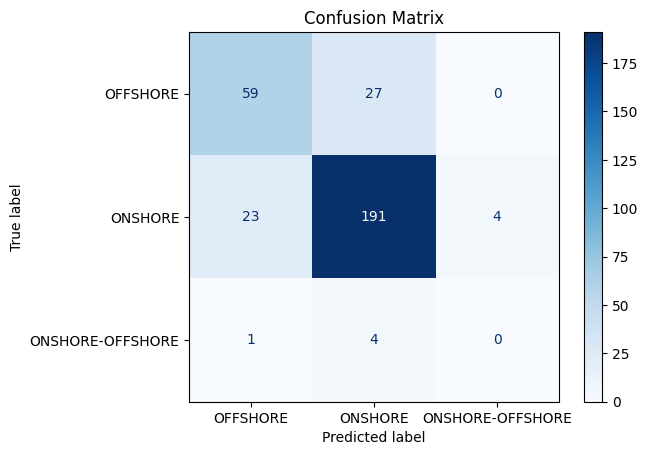

                  precision    recall  f1-score   support

        OFFSHORE       0.71      0.69      0.70        86
         ONSHORE       0.86      0.88      0.87       218
ONSHORE-OFFSHORE       0.00      0.00      0.00         5

        accuracy                           0.81       309
       macro avg       0.52      0.52      0.52       309
    weighted avg       0.80      0.81      0.81       309



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# –í—ã–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ (X) –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (y)
X = df_encoded.drop(columns=['Onshore/Offshore'])
y = df_encoded['Onshore/Offshore']

# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π
model = DecisionTreeClassifier(random_state=42)

# –ò—Å–ø–æ–ª—å–∑—É–µ–º K-Fold –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é (5 —Ñ–æ–ª–¥–æ–≤)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# –•—Ä–∞–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# –í—Å—Ç–∞–≤–ª—è–µ–º target_mapping
target_encoder = label_encoders['Onshore/Offshore']  # –ü–æ–ª—É—á–∞–µ–º —ç–Ω–∫–æ–¥–µ—Ä –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))

# –•—Ä–∞–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∏ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –≤—Å–µ—Ö —Ñ–æ–ª–¥–æ–≤
y_pred_all = []
y_test_all = []

# –í—ã–ø–æ–ª–Ω—è–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é –≤—Ä—É—á–Ω—É—é
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # –°–æ–±–∏—Ä–∞–µ–º –≤—Å–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
    y_pred_all.extend(y_pred)
    y_test_all.extend(y_test)

    # –í—ã—á–∏—Å–ª—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # –°–æ–±–∏—Ä–∞–µ–º –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫ –¥–ª—è –≤—Å–µ—Ö —Ñ–æ–ª–¥–æ–≤
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=model.classes_))

# –í—ã–≤–æ–¥–∏–º —Å—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏
print('–ë–µ–∑ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫–ª–∞—Å—Å–æ–≤')
print(f'Accuracy: {np.mean(accuracy_scores):.4f}')
print(f'Precision: {np.mean(precision_scores):.4f}')
print(f'Recall: {np.mean(recall_scores):.4f}')
print(f'F1-score: {np.mean(f1_scores):.4f}')

# –°—É–º–º–∏—Ä—É–µ–º –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫ –ø–æ –≤—Å–µ–º —Ñ–æ–ª–¥–∞–º
conf_matrix = np.sum(conf_matrices, axis=0)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∏—Ç–æ–≥–æ–≤—É—é –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫ —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –∏–∑ target_mapping
disp_labels = []
for label in model.classes_:
    # –î–ª—è –∫–∞–∂–¥–æ–π –º–µ—Ç–∫–∏ –∏–∑ model.classes_ –∏—â–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –≤ target_mapping
    for key, value in target_mapping.items():
        if value == label:
            disp_labels.append(key)
            break

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=disp_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –º–µ—Ç–∫–∏
y_pred_str_all = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_pred_all]
y_test_str_all = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_test_all]

# –í—ã–≤–æ–¥–∏–º –æ—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
print(classification_report(y_test_str_all, y_pred_str_all, target_names=list(target_mapping.keys())))


In [ ]:
pip install imblearn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 238.4/238.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE

# –í—ã–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ (X) –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (y)
X = df_encoded.drop(columns=['Onshore/Offshore'])
y = df_encoded['Onshore/Offshore']

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –¥–æ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è SMOTE
print("–î–æ SMOTE:")
print(y.value_counts())

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ –¥–ª—è sampling_strategy
sampling_strategy = {0: 218, 1: 218, 2: 218}  # –í—Å–µ –∫–ª–∞—Å—Å—ã —É–≤–µ–ª–∏—á–∏–≤–∞–µ–º –¥–æ 218 –ø—Ä–∏–º–µ—Ä–æ–≤

# –ü—Ä–∏–º–µ–Ω—è–µ–º SMOTE –¥–ª—è –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫–ª–∞—Å—Å–æ–≤ —Å –∑–∞–¥–∞–Ω–Ω—ã–º sampling_strategy
smote = SMOTE(random_state=42, k_neighbors=2, sampling_strategy=sampling_strategy)  # –£–º–µ–Ω—å—à–∞–µ–º k_neighbors, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
X_resampled, y_resampled = smote.fit_resample(X, y)

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è SMOTE
print("\n–ü–æ—Å–ª–µ SMOTE:")
print(y_resampled.value_counts())


–î–æ SMOTE:
Onshore/Offshore
1    218
0     86
2      5
Name: count, dtype: int64

–ü–æ—Å–ª–µ SMOTE:
Onshore/Offshore
1    218
0    218
2    218
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ (X) –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (y)
X = X_resampled
y = y_resampled

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# –û—Ü–µ–Ω–∫–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print('–ó–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
print(feature_importance_df)


–ó–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
                           Feature  Importance
7                        Longitude    0.237662
15    Thickness (gross average ft)    0.224953
5                  Tectonic regime    0.191614
12                           Depth    0.139276
6                         Latitude    0.050262
16  Thickness (net pay average ft)    0.045713
10                Reservoir status    0.029574
1                   Reservoir unit    0.021436
19                 Thickness_ratio    0.012822
18                    Permeability    0.012273
13                Reservoir period    0.011674
8                 Operator company    0.011659
11              Structural setting    0.007004
20                       Continent    0.004077
3                           Region    0.000000
2                          Country    0.000000
0                       Field name    0.000000
4                       Basin name    0.000000
9                 Hydrocarbon type    0.000000
14                  

–í—ã–≤–æ–¥:
- –ø–æ—Å–ª–µ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫–ª–∞—Å—Å–æ–º –ø–æ –∞–ª–≥–æ—Ä–∏—Ç–º—É SMOTE –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–º–µ–Ω—è–ª–∏—Å—å:

- –∑–Ω–∞—á–µ–Ω–∏–µ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —É–º–µ–Ω—å—à–∏–ª–æ—Å—å

- –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —É–≤–µ–ª–∏—á–∏–ª–æ—Å—å
- –≤–≤–µ–¥–µ–Ω–Ω–∞—è –Ω–æ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è Continent –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –æ–∫–∞–∑–∞–ª–∞—Å—å –∑–Ω–∞—á–∏–º–æ–π (1,3%)

–í–æ–∑–º–æ–∂–Ω–æ —á—Ç–æ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–º –¥–ª—è —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å–æ–≤ –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ –æ—Ç–≤–µ—á–∞–µ—Ç –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è offshore/onshore

- –±–µ–∑ –∫—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏–∏

Accuracy: 0.8782
Precision: 0.8781
Recall: 0.8782
F1-score: 0.8767


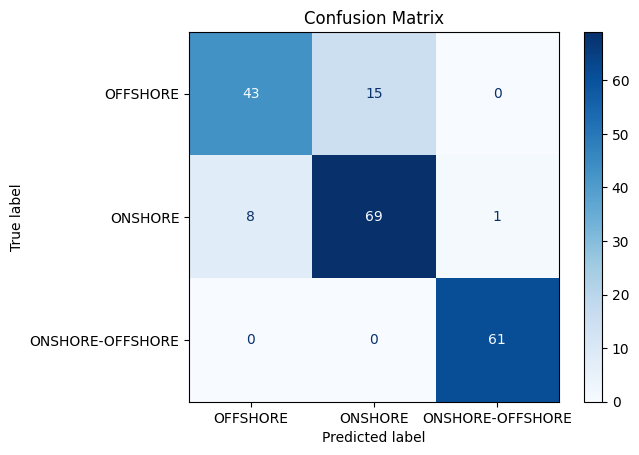

                  precision    recall  f1-score   support

        OFFSHORE       0.84      0.74      0.79        58
         ONSHORE       0.82      0.88      0.85        78
ONSHORE-OFFSHORE       0.98      1.00      0.99        61

        accuracy                           0.88       197
       macro avg       0.88      0.88      0.88       197
    weighted avg       0.88      0.88      0.88       197



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
import numpy as np
import matplotlib.pyplot as plt

# –í—ã–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ (X) –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (y)
X = X_resampled
y = y_resampled

# –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏ (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π
model = DecisionTreeClassifier(random_state=42)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
model.fit(X_train, y_train)

# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred = model.predict(X_test)

# –í—ã—á–∏—Å–ª—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# –í—ã–≤–æ–¥–∏–º –º–µ—Ç—Ä–∏–∫–∏
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –∏ –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# –ü–æ–ª—É—á–∞–µ–º –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
target_encoder = label_encoders['Onshore/Offshore']
target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))

disp_labels = [key for key, value in target_mapping.items() if value in model.classes_]

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=disp_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –º–µ—Ç–∫–∏
y_pred_str = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_pred]
y_test_str = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_test]

# –í—ã–≤–æ–¥–∏–º –æ—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
print(classification_report(y_test_str, y_pred_str, target_names=list(target_mapping.keys())))


- —Å –∫—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏–µ–π

–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ {0: 218, 1: 218, 2: 218}
Accuracy: 0.9006
Precision: 0.9036
Recall: 0.9006
F1-score: 0.9006


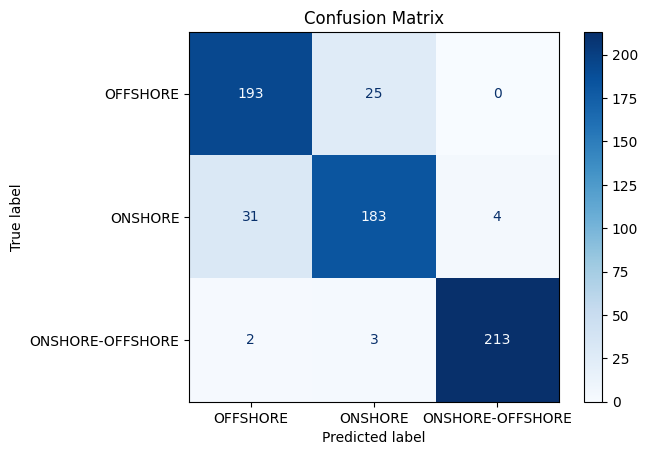

                  precision    recall  f1-score   support

        OFFSHORE       0.85      0.89      0.87       218
         ONSHORE       0.87      0.84      0.85       218
ONSHORE-OFFSHORE       0.98      0.98      0.98       218

        accuracy                           0.90       654
       macro avg       0.90      0.90      0.90       654
    weighted avg       0.90      0.90      0.90       654



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# –í—ã–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ (X) –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (y)
X = X_resampled
y = y_resampled


# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π
model = DecisionTreeClassifier(random_state=42)

# –ò—Å–ø–æ–ª—å–∑—É–µ–º K-Fold –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é (5 —Ñ–æ–ª–¥–æ–≤)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# –•—Ä–∞–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# –í—Å—Ç–∞–≤–ª—è–µ–º target_mapping
target_encoder = label_encoders['Onshore/Offshore']  # –ü–æ–ª—É—á–∞–µ–º —ç–Ω–∫–æ–¥–µ—Ä –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))

# –•—Ä–∞–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∏ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –≤—Å–µ—Ö —Ñ–æ–ª–¥–æ–≤
y_pred_all = []
y_test_all = []

# –í—ã–ø–æ–ª–Ω—è–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é –≤—Ä—É—á–Ω—É—é
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # –°–æ–±–∏—Ä–∞–µ–º –≤—Å–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
    y_pred_all.extend(y_pred)
    y_test_all.extend(y_test)

    # –í—ã—á–∏—Å–ª—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # –°–æ–±–∏—Ä–∞–µ–º –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫ –¥–ª—è –≤—Å–µ—Ö —Ñ–æ–ª–¥–æ–≤
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=model.classes_))

# –í—ã–≤–æ–¥–∏–º —Å—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏
print(f'–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ {sampling_strategy}')
print(f'Accuracy: {np.mean(accuracy_scores):.4f}')
print(f'Precision: {np.mean(precision_scores):.4f}')
print(f'Recall: {np.mean(recall_scores):.4f}')
print(f'F1-score: {np.mean(f1_scores):.4f}')

# –°—É–º–º–∏—Ä—É–µ–º –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫ –ø–æ –≤—Å–µ–º —Ñ–æ–ª–¥–∞–º
conf_matrix = np.sum(conf_matrices, axis=0)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∏—Ç–æ–≥–æ–≤—É—é –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫ —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –∏–∑ target_mapping
disp_labels = []
for label in model.classes_:
    # –î–ª—è –∫–∞–∂–¥–æ–π –º–µ—Ç–∫–∏ –∏–∑ model.classes_ –∏—â–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –≤ target_mapping
    for key, value in target_mapping.items():
        if value == label:
            disp_labels.append(key)
            break

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=disp_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –º–µ—Ç–∫–∏
y_pred_str_all = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_pred_all]
y_test_str_all = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in y_test_all]

# –í—ã–≤–æ–¥–∏–º –æ—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
print(classification_report(y_test_str_all, y_pred_str_all, target_names=list(target_mapping.keys())))


–í—ã–≤–æ–¥:

- –º–æ–¥–µ–ª—å —Å –±–∞–ª–∞–Ω—Å–æ–º –∫–ª–∞—Å—Å–æ–≤ 218/218/218 –≤ —Ü–µ–ª–æ–≤ –ª—É—á—à–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç —á–µ–º –º–æ–¥–µ–ª—å —Å –±–∞–ª–∞–Ω—Å–æ–º 200/218/175
- –Ω–æ –º–æ–¥–µ–ª—å —Å –±–∞–ª–∞–Ω—Å–æ–º 200/218/175 –Ω–µ–º–Ω–æ–≥–æ –ª—É—á—à–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç ONSHORE (–º–µ–Ω—å—à–µ –æ—à–∏–±–æ–∫ —Å ONSHORE-OFFSHORE).  

# 7. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

In [ ]:
# –ù–∞–π–¥–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤ –∫–∞–∂–¥–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ
unique_in_df = df.columns.difference(df_test.columns)
unique_in_df_test = df_test.columns.difference(df.columns)

# –í—ã–≤–µ–¥–µ–º –∏—Ö
print("–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤  train –¥–∞—Ç–∞—Å–µ—Ç–µ:", unique_in_df)
print("–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤–æ test –¥–∞—Ç–∞—Å–µ—Ç–µ:", unique_in_df_test)


–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤  train –¥–∞—Ç–∞—Å–µ—Ç–µ: Index(['Onshore/Offshore'], dtype='object')
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤–æ test –¥–∞—Ç–∞—Å–µ—Ç–µ: Index([], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import HashingVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy={0: 218, 1: 218, 2: 218}, random_state=42)

# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö (df –∏ df_test —É–∂–µ –∑–∞–≥—Ä—É–∂–µ–Ω—ã)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
target_col = 'Onshore/Offshore'
hashing_cols = ['Field name', 'Reservoir unit']
categorical_cols = list(df.select_dtypes(include=['object']).columns)

# –ë–µ–∑–æ–ø–∞—Å–Ω–æ–µ —É–¥–∞–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

categorical_cols = [col for col in categorical_cols if col not in hashing_cols]  # –ò—Å–∫–ª—é—á–∞–µ–º —Ö–µ—à–∏—Ä—É–µ–º—ã–µ

# 2. Label Encoding –¥–ª—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (—Ç–æ–ª—å–∫–æ –≤ df)
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –≤ df_test
if target_col in df_test.columns:
    df_test[target_col] = label_encoder.transform(df_test[target_col])  # –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç—É –∂–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—é

# 3. One-Hot Encoding –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
one_hot_encoded_train = one_hot_encoder.fit_transform(df[categorical_cols])
one_hot_encoded_test = one_hot_encoder.transform(df_test[categorical_cols])

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤ –∏–∑ One-Hot Encoding
one_hot_columns = one_hot_encoder.get_feature_names_out(categorical_cols)
df_one_hot = pd.DataFrame(one_hot_encoded_train, columns=one_hot_columns)
df_test_one_hot = pd.DataFrame(one_hot_encoded_test, columns=one_hot_columns)

# 4. HashingVectorizer –¥–ª—è 'Field name' –∏ 'Reservoir unit'
hash_vectorizer = HashingVectorizer(n_features=10, norm= None, alternate_sign=False)

for col in hashing_cols:
    df_hash = pd.DataFrame(hash_vectorizer.fit_transform(df[col].astype(str)).toarray())
    df_test_hash = pd.DataFrame(hash_vectorizer.transform(df_test[col].astype(str)).toarray())

    # –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º –∫–æ–ª–æ–Ω–∫–∏, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –∫–æ–Ω—Ñ–ª–∏–∫—Ç–æ–≤
    df_hash.columns = [f"{col}_hash_{i}" for i in range(df_hash.shape[1])]
    df_test_hash.columns = [f"{col}_hash_{i}" for i in range(df_test_hash.shape[1])]

    # –î–æ–±–∞–≤–ª—è–µ–º –≤ –æ—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    df = pd.concat([df, df_hash], axis=1)
    df_test = pd.concat([df_test, df_test_hash], axis=1)

# 5. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
numeric_cols = df.select_dtypes(include=[np.number]).columns

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ df_test –∏ –ø—Ä–∏–º–µ–Ω–∏–º –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é —Ç–æ–ª—å–∫–æ –¥–ª—è —ç—Ç–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
numeric_cols_in_both = [col for col in numeric_cols if col in df_test.columns]

if numeric_cols_in_both:
    scaler = StandardScaler()
    df[numeric_cols_in_both] = scaler.fit_transform(df[numeric_cols_in_both])
    df_test[numeric_cols_in_both] = scaler.transform(df_test[numeric_cols_in_both])

# 6. –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –∏—Ç–æ–≥–æ–≤—ã—Ö –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤
df_resampled = pd.concat([df, df_one_hot], axis=1).drop(columns=categorical_cols + hashing_cols)
df_test_resampled = pd.concat([df_test, df_test_one_hot], axis=1).drop(columns=categorical_cols + hashing_cols)

# 7. –ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ –∫–ª–∞—Å—Å–æ–≤ —Å –ø–æ–º–æ—â—å—é SMOTE (–¢–æ–ª—å–∫–æ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞)
sampling_strategy = {0: 170, 1: 218, 2: 90}  # –í—Å–µ –∫–ª–∞—Å—Å—ã —É–≤–µ–ª–∏—á–∏–≤–∞–µ–º –¥–æ 218 –ø—Ä–∏–º–µ—Ä–æ–≤

#smote = SMOTE(random_state=42, k_neighbors=2, sampling_strategy=sampling_strategy)
adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=42, n_neighbors=2)
# –û—Ç–¥–µ–ª—è–µ–º —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –ø–µ—Ä–µ–¥ SMOTE
X_resampled, y_resampled = adasyn.fit_resample(df_resampled.drop(columns=[target_col]), df_resampled[target_col])

# –°–æ–∑–¥–∞–µ–º –∏—Ç–æ–≥–æ–≤—ã–π DataFrame –ø–æ—Å–ª–µ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=df_resampled.drop(columns=[target_col]).columns),
                          pd.DataFrame(y_resampled, columns=[target_col])], axis=1)

# –í—ã–≤–æ–¥ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –≥–æ—Ç–æ–≤—ã—Ö –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö
print("Train set shape (after SMOTE):", df_resampled.shape)
print("Test set shape:", df_test_resampled.shape)


Train set shape (after SMOTE): (467, 420)
Test set shape: (133, 419)


In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ NaN –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ
nan_train = df_resampled.isna().sum().sum()
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ NaN –≤ df_resampled: {nan_train}")

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ NaN –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ
nan_test = df_test_resampled.isna().sum().sum()
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ NaN –≤ df_test_resampled: {nan_test}")

# –ï—Å–ª–∏ –Ω—É–∂–Ω–æ –≤—ã–≤–µ—Å—Ç–∏, –≤ –∫–∞–∫–∏—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –µ—Å—Ç—å NaN
if nan_train > 0:
    print("\n–ö–æ–ª–æ–Ω–∫–∏ —Å NaN –≤ df_resampled:")
    print(df_resampled.isna().sum()[df_resampled.isna().sum() > 0])

if nan_test > 0:
    print("\n–ö–æ–ª–æ–Ω–∫–∏ —Å NaN –≤ df_test_resampled:")
    print(df_test_resampled.isna().sum()[df_test_resampled.isna().sum() > 0])


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ NaN –≤ df_resampled: 0
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ NaN –≤ df_test_resampled: 26

–ö–æ–ª–æ–Ω–∫–∏ —Å NaN –≤ df_test_resampled:
Latitude     13
Longitude    13
dtype: int64


In [ ]:
# –í—ã—á–∏—Å–ª—è–µ–º –∞–ø—Ä–∏–æ—Ä–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤
class_prior = y.value_counts(normalize=True).sort_index().tolist()

# –í—ã–≤–æ–¥–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –∞–ø—Ä–∏–æ—Ä–Ω—ã—Ö –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
print("–ê–ø—Ä–∏–æ—Ä–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤:")
print(class_prior)

–ê–ø—Ä–∏–æ—Ä–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤:
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


In [ ]:
import numpy as np
import pandas as pd
import pickle  # –î–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report

# 1. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 2. –í—ã–±–æ—Ä –º–æ–¥–µ–ª–∏ –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
best_params = {'var_smoothing': 1e-09}  # –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è GaussianNB
# –í—ã—á–∏—Å–ª—è–µ–º –∞–ø—Ä–∏–æ—Ä–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤
class_prior = y.value_counts(normalize=True).sort_index().tolist()
# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å —Å –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º–∏ priors
model = GaussianNB(var_smoothing=best_params['var_smoothing'], priors=class_prior)

# 3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
model.fit(X, y)

# 4. –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Ö –∂–µ –¥–∞–Ω–Ω—ã—Ö (–µ—Å–ª–∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è, –∏–Ω–∞—á–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å X_test)
y_pred = model.predict(X)

# 5. –í—ã–≤–æ–¥ –æ—Ç—á–µ—Ç–∞ –ø–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", best_params)
print("\nClassification Report:")
print(classification_report(y, y_pred))

# 6. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≤ —Ñ–∞–π–ª
model_filename = "naive_bayes_best_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"\n–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ {model_filename}")


–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'var_smoothing': 1e-09}

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       159
           1       1.00      0.96      0.98       218
           2       1.00      1.00      1.00        90

    accuracy                           0.98       467
   macro avg       0.98      0.99      0.99       467
weighted avg       0.98      0.98      0.98       467


–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ naive_bayes_best_model.pkl


In [ ]:
pip install tpot

  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 131.0/131.0 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 214.0/214.0 kB 13.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.4/1.4 MB 35.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52.0/52.0 kB 4.1 MB

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# 1. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 2. –†–∞–∑–¥–µ–ª—è–µ–º –Ω–∞ train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# 3. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º TPOT (—É–±–∏—Ä–∞–µ–º verbosity)
tpot = TPOTClassifier(generations=5, population_size=20, random_state=42)

# 4. –û–±—É—á–∞–µ–º TPOT
tpot.fit(X_train, y_train)

# 5. –í—ã–≤–æ–¥–∏–º –ª—É—á—à—É—é –Ω–∞–π–¥–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
best_model = tpot.fitted_pipeline_

print("\nüèÜ –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –æ—Ç TPOT:")
print(best_model)

# 6. –û—Ü–µ–Ω–∏–≤–∞–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
accuracy = tpot.score(X_test, y_test)
print(f"\nüîç Accuracy –Ω–∞ —Ç–µ—Å—Ç–µ: {accuracy:.4f}")

# 7. –≠–∫—Å–ø–æ—Ä—Ç–∏—Ä—É–µ–º –∫–æ–¥ –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
tpot.export("best_model.py")


/usr/local/lib/python3.11/dist-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36603
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39059'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:36757 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36757
INFO:distributed.core:Starting established connection to tcp://127.0.0.1

KeyboardInterrupt: 

In [ ]:
from tune_sklearn import TuneSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ç–≤–æ–∏ –¥–∞–Ω–Ω—ã–µ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–æ–¥–±–æ—Ä–∞
param_distributions = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10]
}

# –ü–æ–¥–±–∏—Ä–∞–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
tune_search = TuneSearchCV(
    RandomForestClassifier(),
    param_distributions=param_distributions,
    n_trials=10,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –ø–æ–∏—Å–∫–∞
    scoring="accuracy",
    random_state=42
)

# –û–±—É—á–∞–µ–º
tune_search.fit(X_train, y_train)

# –í—ã–≤–æ–¥–∏–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
best_model = tune_search.best_estimator_
best_params = tune_search.best_params_

print("\nüèÜ –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –æ—Ç Tune-sklearn:")
print(best_model)

print("\n‚öôÔ∏è –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:")
print(best_params)

# –û—Ü–µ–Ω–∏–≤–∞–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å
accuracy = best_model.score(X_test, y_test)
print(f"\nüîç Accuracy –Ω–∞ —Ç–µ—Å—Ç–µ: {accuracy:.4f}")


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import pickle

# 1. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 2. –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞
model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, subsample=1, random_state=42)


# 3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model.fit(X, y)

# 4. –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Ö –∂–µ –¥–∞–Ω–Ω—ã—Ö (–º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å X_test, –µ—Å–ª–∏ –µ—Å—Ç—å)
y_pred = model.predict(X)

# 5. –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
print("Classification Report:")
print(classification_report(y, y_pred))

# 6. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model_filename = "gradient_boosting_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"\n–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ {model_filename}")


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pickle

# 1. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 2. –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ XGBoost
model = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, subsample=1, random_state=42, use_label_encoder=False, eval_metric='logloss')
#model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, subsample=1, colsample_bytree=1, random_state=42)

#'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1

# 3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model.fit(X, y)

# 4. –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Ö –∂–µ –¥–∞–Ω–Ω—ã—Ö (–º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å X_test, –µ—Å–ª–∏ –µ—Å—Ç—å)
y_pred = model.predict(X)

# 5. –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
print("Classification Report:")
print(classification_report(y, y_pred))

# 6. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model_filename = "xgboost_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"\n–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ {model_filename}")


In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
import pickle

# 1. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X = df_resampled.drop(columns=['Onshore/Offshore'])
y = df_resampled['Onshore/Offshore']

# 1. –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ CatBoost
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=50
)

# 2. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
model.fit(X, y)

# 3. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model_filename = "catboost_model.cbm"
model.save_model(model_filename)

print(f"\n–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ {model_filename}")


In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ df_test_resampled
missing_values = df_test_resampled.isna().sum()

# –í—ã–≤–µ–¥–µ–º —Å—Ç–æ–ª–±—Ü—ã —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ
missing_values[missing_values > 0]


In [ ]:
df_test_resampled.columns.tolist()

In [ ]:
import numpy as np
import pandas as pd

# –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ df_test_resampled —É–∂–µ –∑–∞–≥—Ä—É–∂–µ–Ω
# –ü–µ—Ä–µ–≤–æ–¥–∏–º "unknown" –≤ NaN –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
df_test_resampled.replace({"unknown": np.nan}, inplace=True)

# –°—Ç–æ–ª–±—Ü—ã –¥–ª—è —Ö–µ—à–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
hash_columns = [f'Field name_hash_{i}' for i in range(10)]

# –®–∞–≥ 1: –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ Latitude –∏–ª–∏ Longitude —Ä–∞–≤–Ω—ã NaN
rows_with_missing_coords = df_test_resampled[df_test_resampled['Latitude'].isna() | df_test_resampled['Longitude'].isna()]

# –°–ø–∏—Å–æ–∫ –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫
updated_rows = []

# –®–∞–≥ 2: –î–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –∏—â–µ–º –º–µ–¥–∏–∞–Ω—É –ø–æ —Å—Ç—Ä–æ–∫–∞–º —Å —Ç–∞–∫–∏–º –∂–µ –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ —Ö–µ—à–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö
for index, row in rows_with_missing_coords.iterrows():
    # –ü–æ–ª—É—á–∞–µ–º —Ö–µ—à–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —Ç–µ–∫—É—â–µ–π —Å—Ç—Ä–æ–∫–∏
    hash_values = row[hash_columns].values

    # –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ç–∞–∫–∏–º–∏ –∂–µ —Ö–µ—à–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
    matching_rows = df_test_resampled[(df_test_resampled[hash_columns] == hash_values).all(axis=1)]

    # –ï—Å–ª–∏ –µ—Å—Ç—å —Å—Ç—Ä–æ–∫–∏ –¥–ª—è –∑–∞–º–µ–Ω—ã
    if not matching_rows.empty:
        # –ù–∞—Ö–æ–¥–∏–º –º–µ–¥–∏–∞–Ω—É –¥–ª—è Latitude –∏ Longitude
        median_lat = matching_rows['Latitude'].median(skipna=True)
        median_lon = matching_rows['Longitude'].median(skipna=True)

        # –ï—Å–ª–∏ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞–π–¥–µ–Ω—ã, –∑–∞–º–µ–Ω—è–µ–º
        if not np.isnan(median_lat) and not np.isnan(median_lon):
            df_test_resampled.at[index, 'Latitude'] = median_lat
            df_test_resampled.at[index, 'Longitude'] = median_lon
            updated_rows.append(index)

# –í—ã–≤–æ–¥–∏–º –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏
print("–û–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ (–∏–Ω–¥–µ–∫—Å—ã):", updated_rows)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ —Å—Ç—Ä–æ–∫–∏ —Å NaN –≤ Latitude –∏ Longitude –ø–æ—Å–ª–µ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–π
remaining_unknowns = df_test_resampled[df_test_resampled['Latitude'].isna() | df_test_resampled['Longitude'].isna()]
print("–û—Å—Ç–∞–ª–∏—Å—å —Å—Ç—Ä–æ–∫–∏ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏?", not remaining_unknowns.empty)

# –ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –≤—Å–µ—Ö –∑–∞–º–µ–Ω
remaining_unknowns_indices = remaining_unknowns.index.tolist()
print("–ò–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –ø–æ—Å–ª–µ –≤—Å–µ—Ö –∑–∞–º–µ–Ω:")
print(remaining_unknowns_indices)


In [ ]:
import pickle
import pandas as pd

# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å
with open("xgboost_model.pkl", "rb") as f:
    model = pickle.load(f)
#model = CatBoostClassifier()
#model.load_model("catboost_model.cbm")  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –º–µ—Ç–æ–¥

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ –∏–Ω–¥–µ–∫—Å—ã –ø–µ—Ä–µ–¥ –æ–±—Ä–∞–±–æ—Ç–∫–æ–π
df_test_resampled['original_index'] = df_test_resampled.index

# –£–±–∏—Ä–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –≤–æ–∑–º–æ–∂–Ω—ã–µ –ª–∏—à–Ω–∏–µ –∫–æ–ª–æ–Ω–∫–∏ –ø–µ—Ä–µ–¥ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º
X_test = df_test_resampled.drop(columns=['Onshore/Offshore', 'original_index'], errors='ignore')

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
if X_test.isna().sum().sum() > 0:
    print("–í–Ω–∏–º–∞–Ω–∏–µ! –ù–∞–π–¥–µ–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ X_test, –∑–∞–ø–æ–ª–Ω—è–µ–º –∏—Ö.")

    # –ó–∞–ø–æ–ª–Ω—è–µ–º NaN –º–µ–¥–∏–∞–Ω–æ–π (–º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ –¥—Ä—É–≥–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ)
    X_test.fillna(X_test.median(), inplace=True)

# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_test = model.predict(X_test)

# –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ df_test_resampled
df_test_resampled['Onshore/Offshore'] = y_pred_test

# –°–æ–∑–¥–∞–µ–º DataFrame –¥–ª—è submission
submission = df_test_resampled[['original_index', 'Onshore/Offshore']]

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤ CSV
submission.to_csv("submission.csv", sep=",", index=False)

print("\n–§–∞–π–ª 'submission.csv' —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω.")


In [ ]:
print(submission.isna().sum())

In [ ]:
df_test = pd.read_csv(r"/content/drive/MyDrive/ML_DZ3/oil_test.csv")

In [ ]:
# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –≤ df_test —Å–æ–¥–µ—Ä–∂–∞—Ç –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è 'Latitude' –∏ 'Longitude'
df_test_resampled['Latitude'] = df_test['Latitude']
df_test_resampled['Longitude'] = df_test['Longitude']

# –¢–µ–ø–µ—Ä—å df_test_resampled —Å–æ–¥–µ—Ä–∂–∏—Ç –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è 'Latitude' –∏ 'Longitude'


In [ ]:
df_test[['Latitude', 'Longitude']]

In [ ]:
import folium

# –°–æ–∑–¥–∞–µ–º –∫–∞—Ä—Ç—É –º–∏—Ä–∞ —Å —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–π —Ç–æ—á–∫–æ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã (0, 0) - —ç–∫–≤–∞—Ç–æ—Ä –∏ –Ω—É–ª–µ–≤–æ–π –º–µ—Ä–∏–¥–∏–∞–Ω)
map_world = folium.Map(location=[0, 0], zoom_start=2)

# –§–∏–ª—å—Ç—Ä—É–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –µ—Å—Ç—å NaN –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö Latitude –∏–ª–∏ Longitude
df_filtered = df_test_resampled[['Onshore/Offshore', 'Latitude', 'Longitude']].dropna(subset=['Latitude', 'Longitude'])

# –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º —Å—Ç—Ä–æ–∫–∏ –≤ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω–æ–º DataFrame –∏ –¥–æ–±–∞–≤–ª—è–µ–º –º–µ—Ç–∫–∏ —Å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ —Ü–≤–µ—Ç–∞–º–∏
for index, row in df_filtered.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    onshore_offshore = row['Onshore/Offshore']

    # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ü–≤–µ—Ç –º–µ—Ç–∫–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∑–Ω–∞—á–µ–Ω–∏—è Onshore/Offshore
    if onshore_offshore == 0:
        color = 'red'
    elif onshore_offshore == 1:
        color = 'blue'
    elif onshore_offshore == 2:
        color = 'green'
    else:
        color = 'gray'  # –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–µ 0, 1 –∏–ª–∏ 2, —Ç–æ —Å–µ—Ä—ã–π —Ü–≤–µ—Ç

    # –î–æ–±–∞–≤–ª—è–µ–º –º–µ—Ç–∫—É —Å –Ω–æ–º–µ—Ä–æ–º —Å—Ç—Ä–æ–∫–∏
    folium.CircleMarker(location=[latitude, longitude], radius=5, color=color, fill=True, fill_color=color).add_to(map_world)
    folium.Marker([latitude, longitude], popup=f"Row: {index}").add_to(map_world)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∫–∞—Ä—Ç—É
map_world
